In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from time import perf_counter
from time import process_time
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
# Import functions created for this course
import timeit

'''classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']'''
classifiers = ['Logistic']

models = [#svm.SVC(kernel='linear'),
          #svm.SVC(kernel='rbf'),
          #LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_jobs=4,random_state=2018,criterion='gini',n_estimators=100,verbose=False),
          #AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(n_neighbors =3),
          #XGBClassifier(colsample_bytree= 1 , gamma = 1 , max_depth= 10, min_child_weight= 3, n_estimators=100, reg_alpha= 0, reg_lambda= 0, seed= 0),
          #CatBoostClassifier(),
          #GradientBoostingClassifier(random_state=0)]
]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    bcc=[]
    ccc=[]
    dcc=[]
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        start_time = timeit.default_timer()
        model.fit(X_train,Y_train)
        end_time = timeit.default_timer()
        elapsed_time = end_time - start_time
        print("Elapsed time : ",elapsed_time)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        bcc.append(precision_score(Y_test,predictions))
        ccc.append(precision_score(Y_test,predictions))
        dcc.append(precision_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    Score["Precision"] = bcc
    Score.sort_values(by="Precision", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    Score["recall_score"] = ccc
    Score.sort_values(by="recall_score", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    Score["f1_score"] = dcc
    Score.sort_values(by="f1_score", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    
    return Score

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

def plot(score,score1,score2,score3,x,y,c="b",d="x",a="a",b="c", marker = 'o'):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(4,2))
    ax = sns.pointplot(x=gen, y=score,color = c , marker = 'o')
    ax.set(ylim=(x,y))
    ax.set(xlabel="Generation", ylabel="Score",title="logistic regression")
    ax = sns.pointplot(x=gen, y=score1,color = d, marker = 'o')
    ax.set(ylim=(x,y))
    ax.set(xlabel="Generation", ylabel="Score",title="logistic regression")
    ax.set(ylim=(x,y))
    ax = sns.pointplot(x=gen, y=score2,color = a , marker = 'o')
    ax = sns.pointplot(x=gen, y=score3,color = b , marker = 'o')
    ax.set(ylim=(x,y))
    ax.set(xlabel="Generation", ylabel="Score",title="logistic regression")
    #ax.set(xlabel="Generation", ylabel=d)
    #ax.set(ylim=(x,y))
    
    

In [2]:
df = pd.read_csv(r'D:\dataprocessing\creditcard.csv')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
target = 'Class'

In [4]:
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]


In [5]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [41]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass
def generate_pr_curve(clf,X_test):
    y_test_prob=clf.predict_proba(X_test)[:,1]
    precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob)
    pr_score=metrics.auc(recall_rf, precision_rf)
    plt.plot(recall_rf, precision_rf, marker='',label="KNN="+str(pr_score))
    plt.legend(loc=4)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.show()
    pass
    
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,linestyle='solid',label="KNN ="+str(auc))
    plt.legend(loc=4)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.show()
    pass

Class
0    284315
1       492
Name: count, dtype: int64


<Figure size 500x500 with 0 Axes>

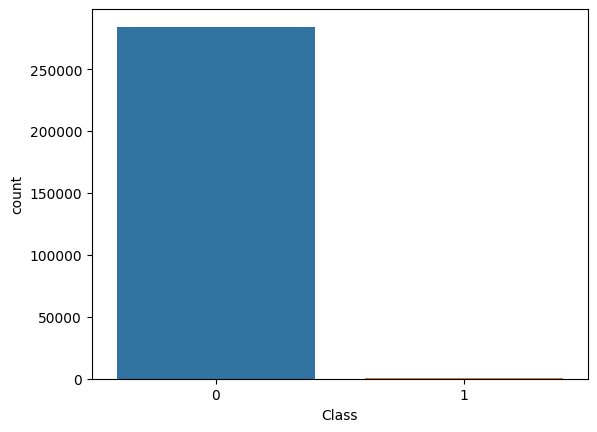

<Figure size 500x500 with 0 Axes>

In [42]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())
plt.figure(figsize=(5, 5), dpi=100)

Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64


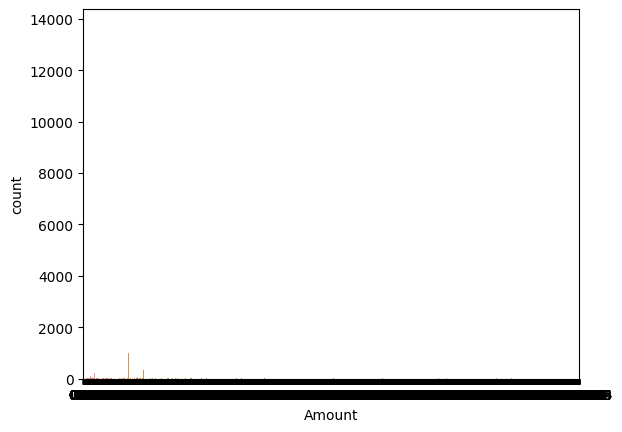

In [43]:
ax = sns.countplot(x='Amount', data=df)
print(df['Amount'].value_counts())

In [44]:
Y_train[target].value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [45]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# SMOTE

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [47]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 227451, 1: 227451}

In [48]:
X=x_train_res
Y=y_train_res
#X = StandardScaler().fit_transform(X)

In [49]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    p_s = []
    r_s=[]
    f1_s=[]
    i=1
    elapsed_time_train=0
    elapsed_time_test=0
    print(sx)
    
   
    for chromosome in population:
        sx.fit(X_train.iloc[:,chromosome],Y_train)
        start_time = timeit.default_timer()
        x_train_prediction = sx.predict(X_train.iloc[:,chromosome])
        end_time = timeit.default_timer()
        elapsed_time=end_time - start_time
        #print("Elapsed time train : ",elapsed_time)
        elapsed_time_train = elapsed_time_train+elapsed_time
        

        start_time = timeit.default_timer()
        x_test_prediction = sx.predict(X_test.iloc[:,chromosome])
        end_time = timeit.default_timer()
        elapsed_time=end_time - start_time
        print("Elapsed time test : ",elapsed_time)
        elapsed_time_test = elapsed_time_test+elapsed_time

        #generate_model_report(Y_test, x_test_prediction)
        cf_matrix=confusion_matrix(x_test_prediction,Y_test)
        
        predictions = sx.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
        p_s.append(precision_score(Y_test,predictions))
        r_s.append(recall_score(Y_test,predictions))
        f1_s.append(f1_score(Y_test,predictions))
        i=i+1
        
        generate_auc_roc_curve(sx, X_test.iloc[:,chromosome])
        generate_pr_curve(sx,X_test.iloc[:,chromosome])
        #y_pred_proba_dt = sx.predict_proba(X_test.iloc[:,chromosome])
        #fpr_dt, tpr_dt, thresholds = generate_auc_roc_curve(Y_test,  y_pred_proba_dt)
        #auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    print(elapsed_time_train)
    print(elapsed_time_test)
    print('shape',X_train.iloc[:,chromosome])
    print('accuracy score ',accuracy_score(Y_test,predictions))
    print('f1 score ',f1_score(Y_test,predictions))
    scores,p_s,r_s,f1_s, population = np.array(scores),np.array(p_s),np.array(r_s),np.array(f1_s), np.array(population)
    inds = np.argsort(scores)  
    return (list(scores[inds][::-1]), list(p_s[inds][::-1]),list(r_s[inds][::-1]),list(f1_s[inds][::-1]),list(population[inds,:][::-1]),cf_matrix,elapsed_time_train,elapsed_time_test)


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(sx,df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    
    best_chromo= []
    best_score= []
    best_precission = []
    best_recall = []
    best_f1call = []
    train_time=0
    test_time=0
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        
        scores,p_s,r_s,f1_s, pop_after_fit,cf_matrix,train_s,test_s = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2

        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        best_precission.append(p_s[0])
        best_recall.append(r_s[0])
        best_f1call.append(f1_s[0])
        train_time=train_time+train_s
        test_time=test_time+test_s
        print('confusion matrix',cf_matrix)
    print('final train time',train_time)
    print('final test time',test_time)
    return (best_chromo,best_score,best_precission,best_recall,best_f1call)

In [50]:
X.shape[1]

30

KNeighborsClassifier(leaf_size=2, n_neighbors=2)
Elapsed time test :  66.97061829990707


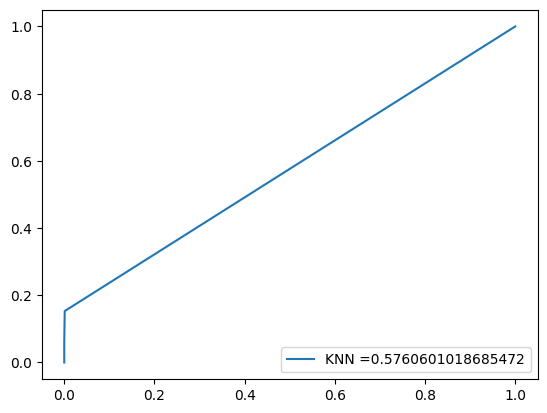

<Figure size 500x500 with 0 Axes>

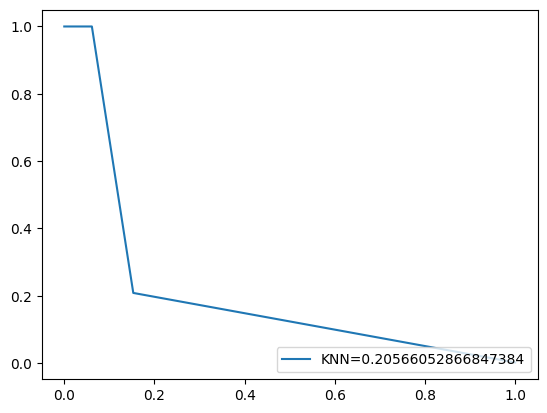

<Figure size 500x500 with 0 Axes>

Elapsed time test :  70.46122459997423


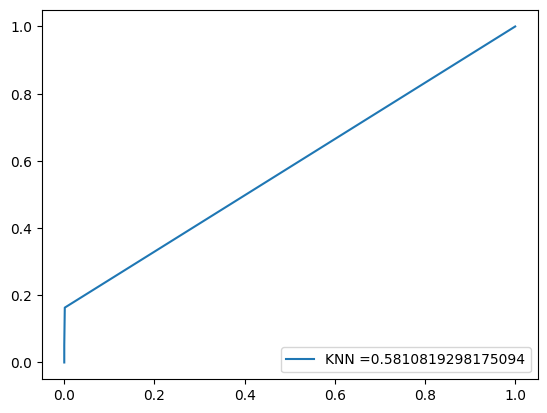

<Figure size 500x500 with 0 Axes>

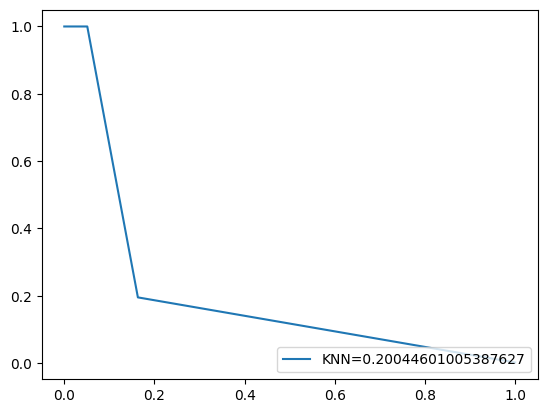

<Figure size 500x500 with 0 Axes>

Elapsed time test :  61.58903229981661


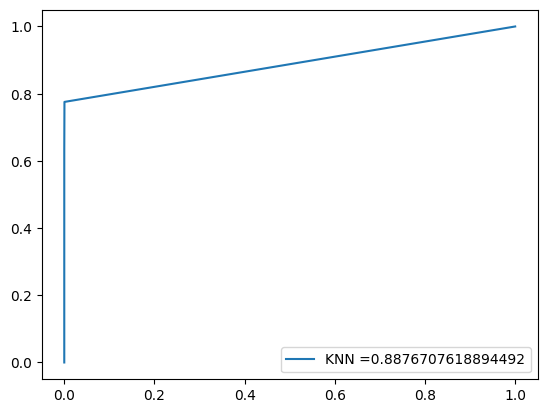

<Figure size 500x500 with 0 Axes>

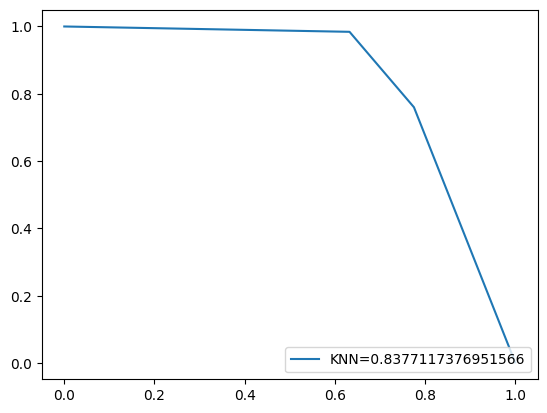

<Figure size 500x500 with 0 Axes>

Elapsed time test :  59.27113570016809


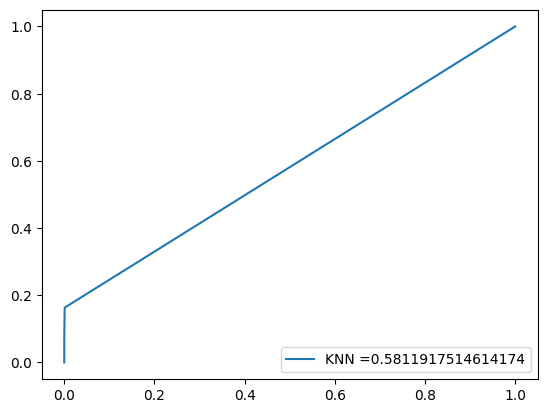

<Figure size 500x500 with 0 Axes>

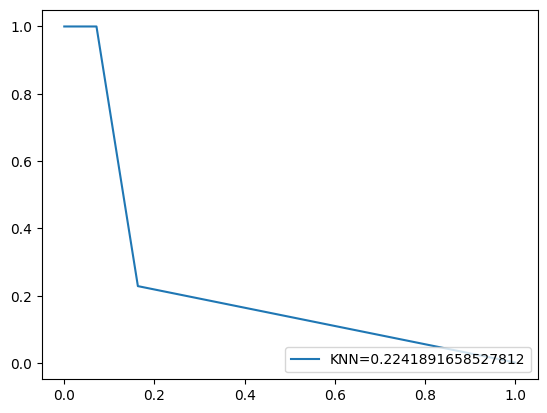

<Figure size 500x500 with 0 Axes>

Elapsed time test :  63.317160699982196


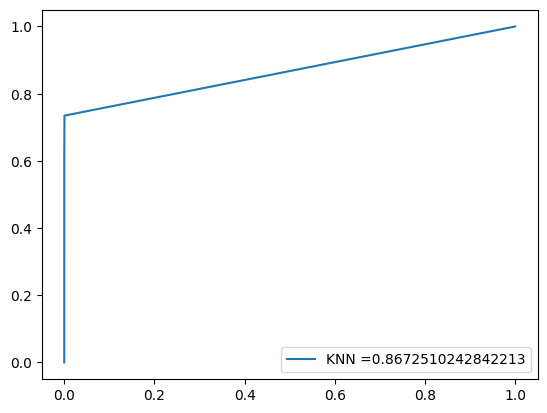

<Figure size 500x500 with 0 Axes>

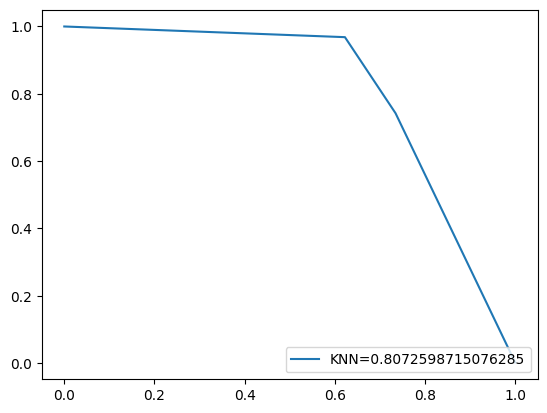

<Figure size 500x500 with 0 Axes>

Elapsed time test :  63.889118700055405


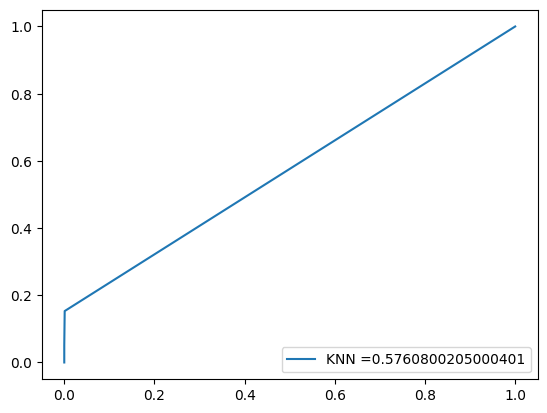

<Figure size 500x500 with 0 Axes>

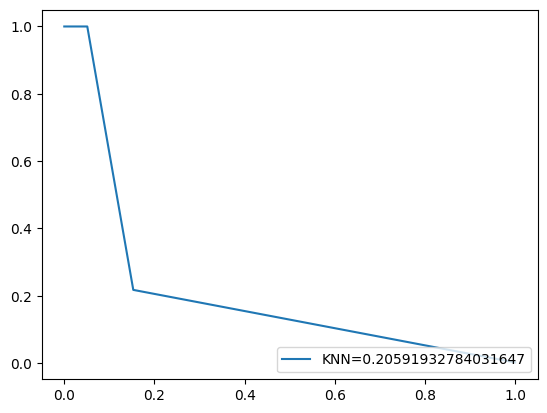

<Figure size 500x500 with 0 Axes>

Elapsed time test :  65.91175259999


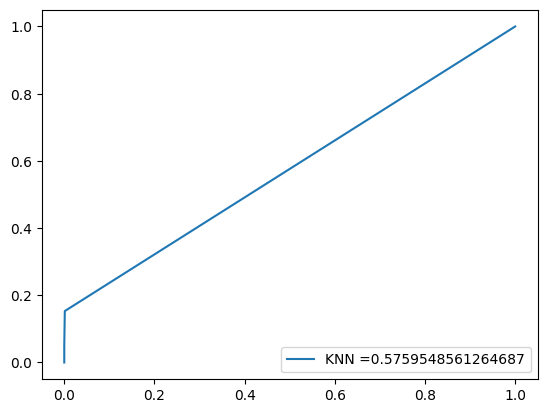

<Figure size 500x500 with 0 Axes>

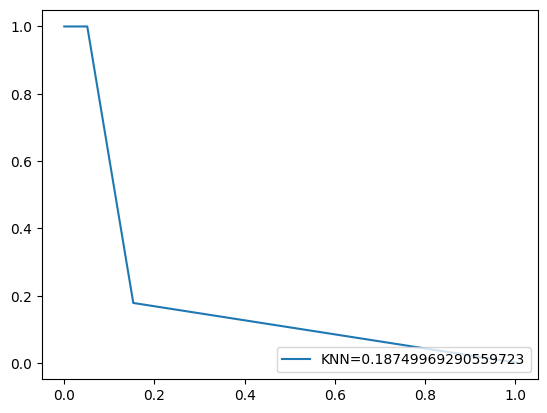

<Figure size 500x500 with 0 Axes>

Elapsed time test :  33.734583699842915


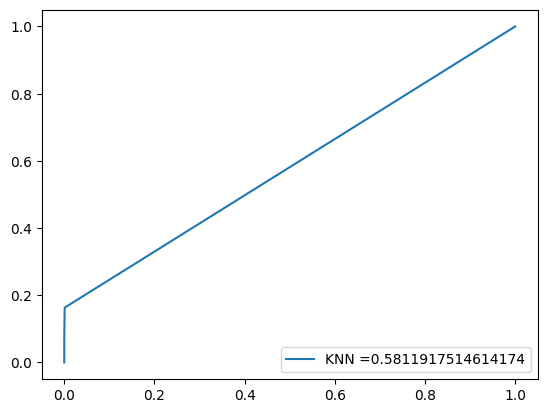

<Figure size 500x500 with 0 Axes>

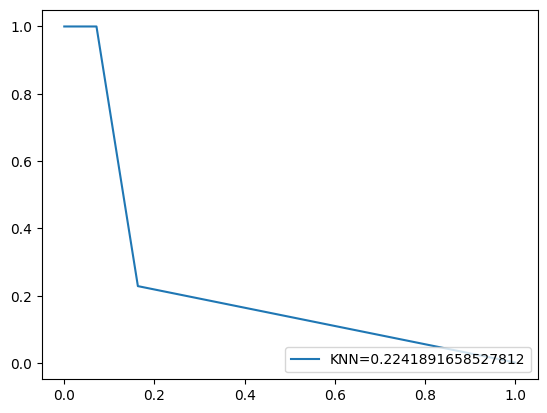

<Figure size 500x500 with 0 Axes>

Elapsed time test :  27.55471449997276


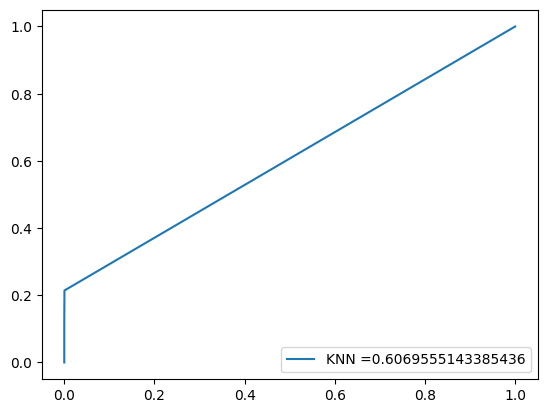

<Figure size 500x500 with 0 Axes>

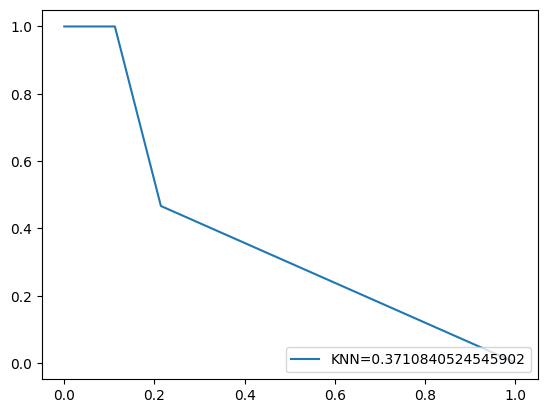

<Figure size 500x500 with 0 Axes>

Elapsed time test :  23.492642000084743


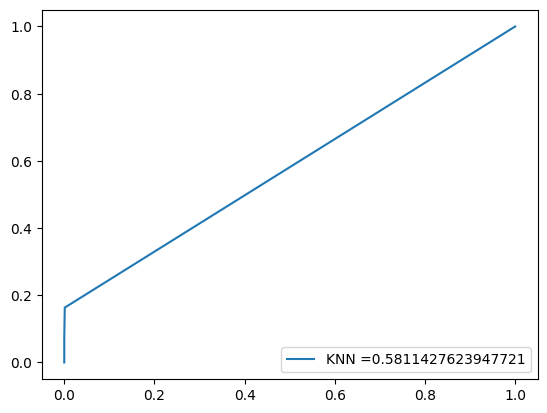

<Figure size 500x500 with 0 Axes>

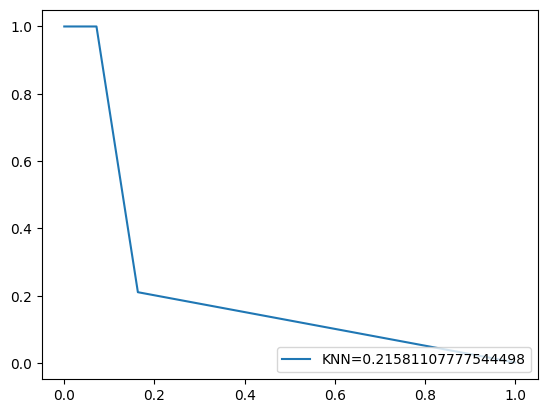

<Figure size 500x500 with 0 Axes>

2113.2018770999275
536.191983099794
shape             Time        V1        V3        V4        V5        V6        V7  \
223361  143352.0  1.955041 -0.315013  0.330155 -0.509374 -0.086197 -0.627978   
165061  117173.0 -0.400975  1.555339 -2.017772 -0.107769  0.168310  0.017959   
238186  149565.0  0.072509 -0.561351 -0.709897  1.080399 -0.359429  0.787858   
150562   93670.0 -0.535045  1.750679  2.769390  0.500089  1.002270  0.847902   
138452   82655.0 -4.026938 -0.429786 -0.029571 -0.855751 -0.480406 -0.435632   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.490512  0.461596 -0.296377 -0.213165 -0.165254   
259178  159000.0 -0.775981 -1.142399 -1.241113  1.940358  3.912076 -0.466107   
131932   79795.0 -0.146609  1.524591  0.485774  0.349308 -0.815198  1.076640   
146867   87931.0 -2.948638 -2.521201 -3.798905  1.866302  2.727695 -0.471769   
121958   76381.0  1.233174  0.386784 -0.698559 -1.034018 -0.637028 -0.502369  

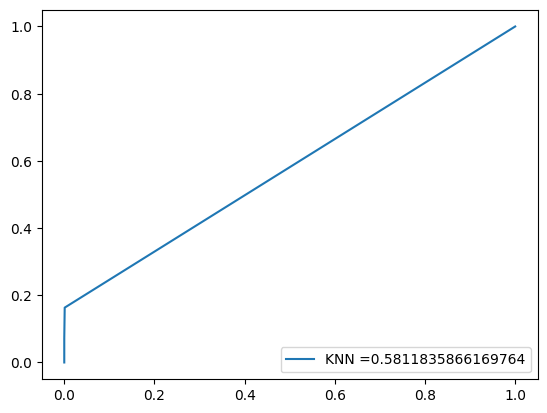

<Figure size 500x500 with 0 Axes>

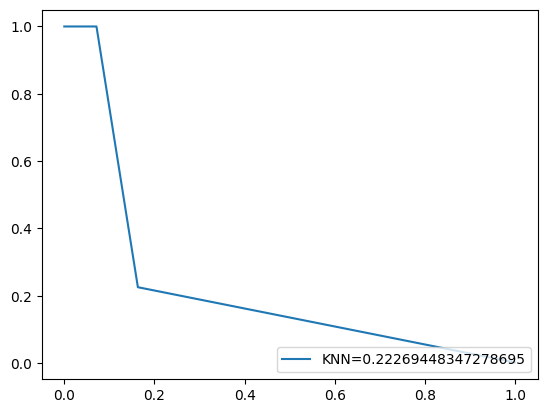

<Figure size 500x500 with 0 Axes>

Elapsed time test :  27.929222099948674


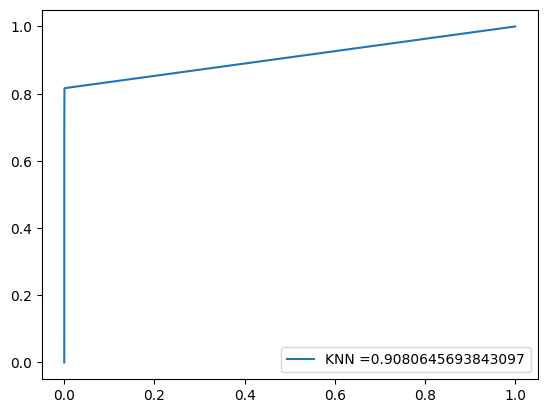

<Figure size 500x500 with 0 Axes>

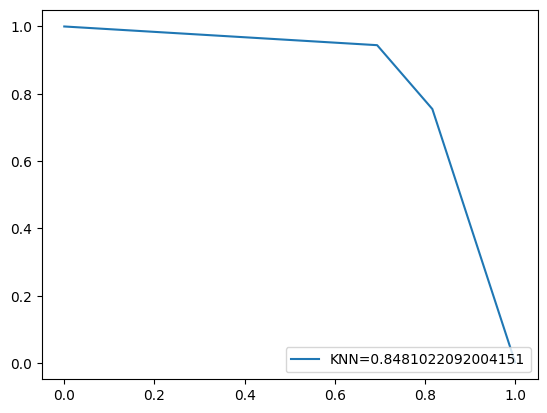

<Figure size 500x500 with 0 Axes>

Elapsed time test :  18.83042709995061


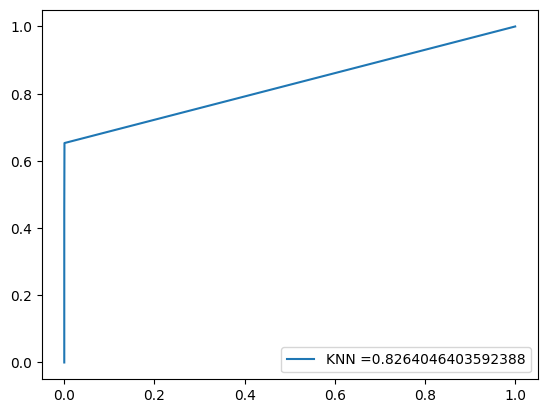

<Figure size 500x500 with 0 Axes>

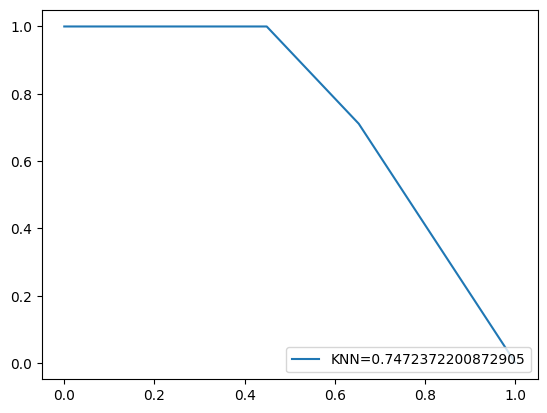

<Figure size 500x500 with 0 Axes>

Elapsed time test :  46.19422860001214


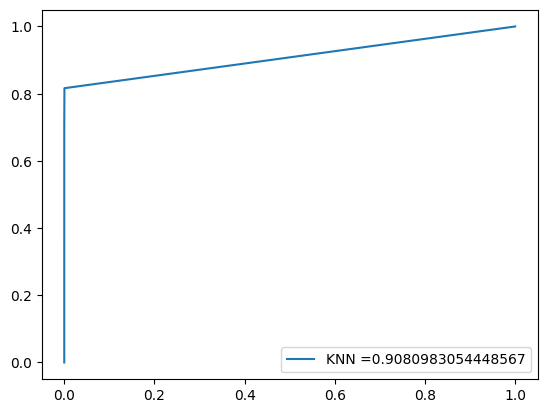

<Figure size 500x500 with 0 Axes>

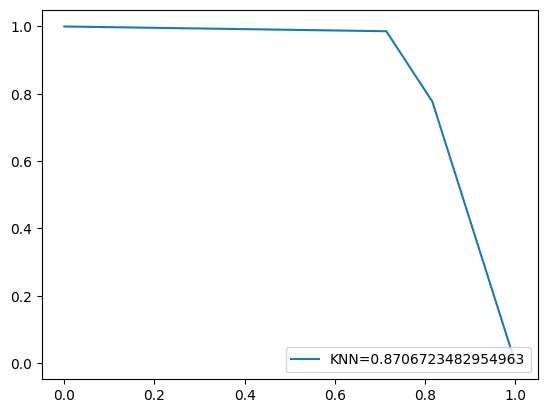

<Figure size 500x500 with 0 Axes>

Elapsed time test :  26.40785920014605


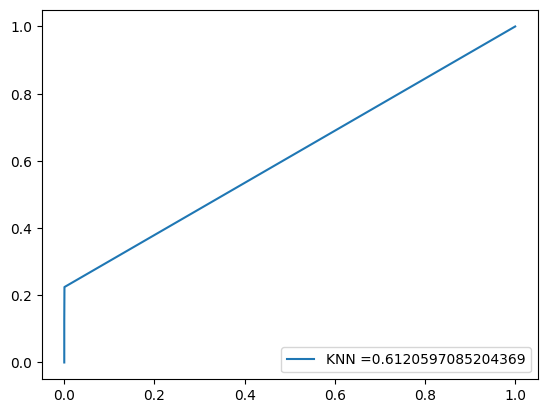

<Figure size 500x500 with 0 Axes>

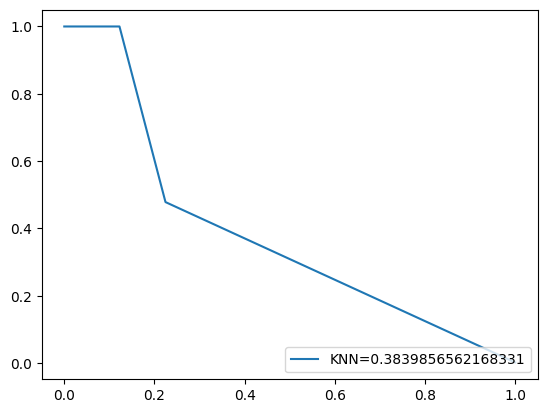

<Figure size 500x500 with 0 Axes>

Elapsed time test :  25.287986499955878


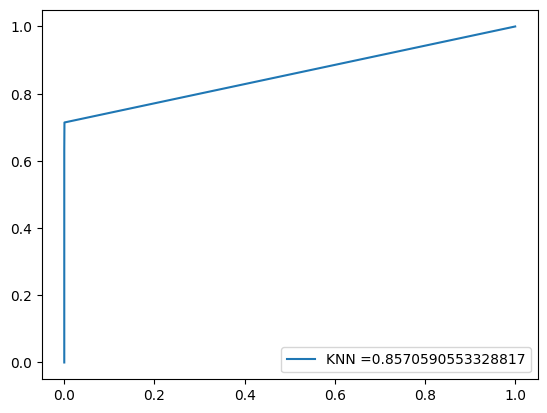

<Figure size 500x500 with 0 Axes>

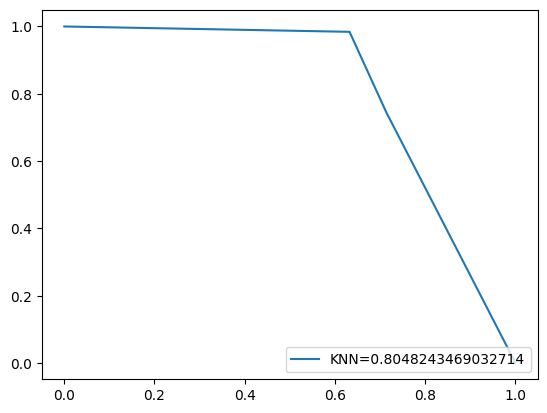

<Figure size 500x500 with 0 Axes>

Elapsed time test :  4.7838210999034345


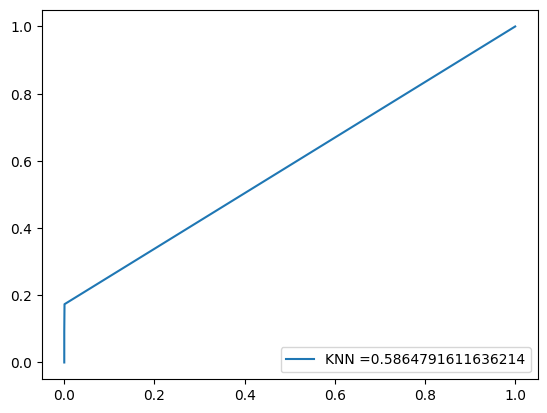

<Figure size 500x500 with 0 Axes>

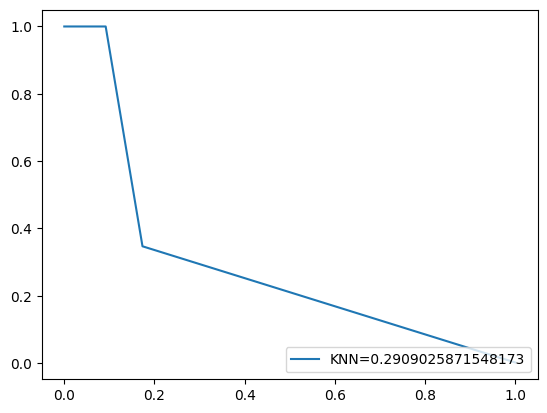

<Figure size 500x500 with 0 Axes>

Elapsed time test :  29.987410999834538


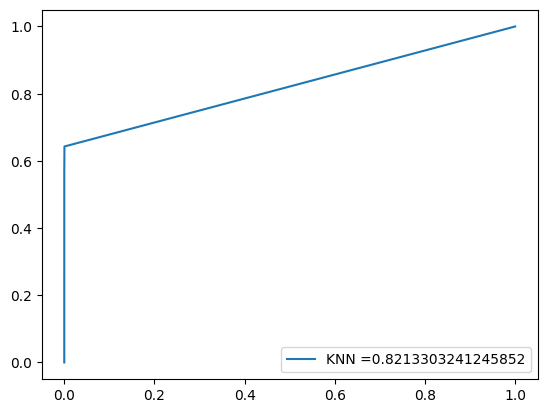

<Figure size 500x500 with 0 Axes>

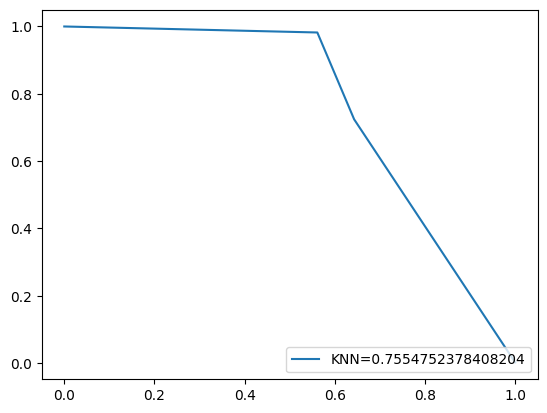

<Figure size 500x500 with 0 Axes>

Elapsed time test :  4.413038099883124


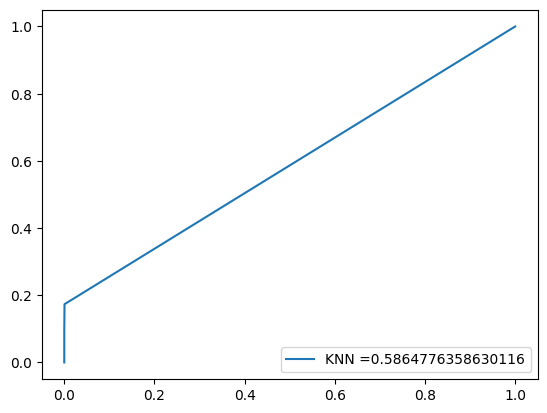

<Figure size 500x500 with 0 Axes>

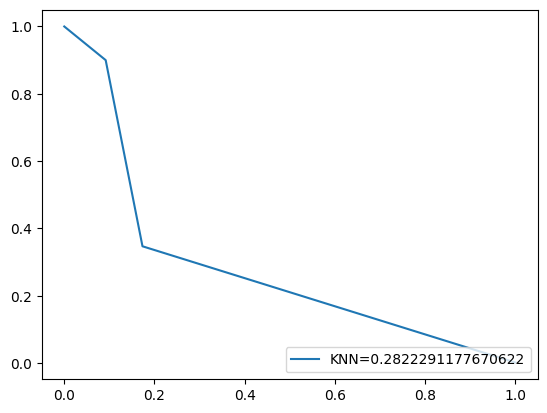

<Figure size 500x500 with 0 Axes>

Elapsed time test :  26.324324699817225


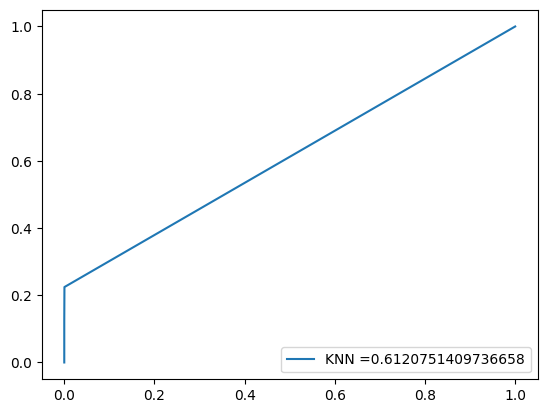

<Figure size 500x500 with 0 Axes>

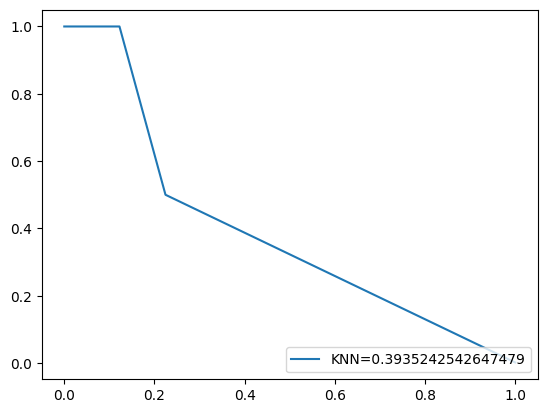

<Figure size 500x500 with 0 Axes>

Elapsed time test :  22.362559200031683


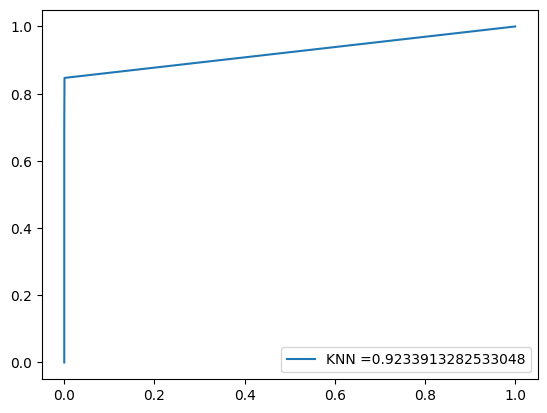

<Figure size 500x500 with 0 Axes>

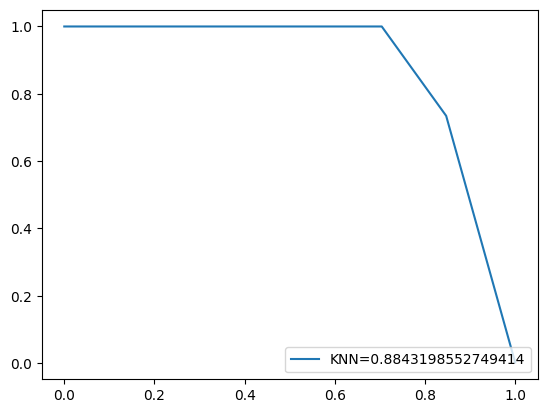

<Figure size 500x500 with 0 Axes>

Elapsed time test :  3.1606114997994155


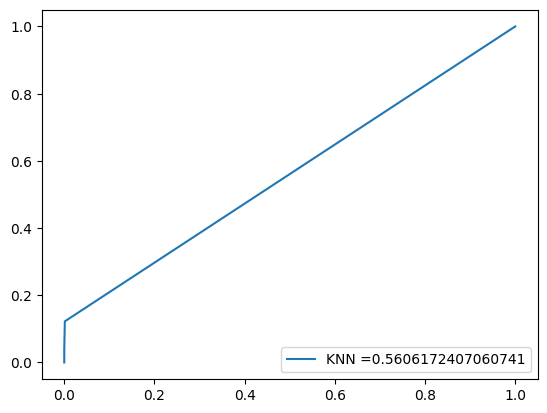

<Figure size 500x500 with 0 Axes>

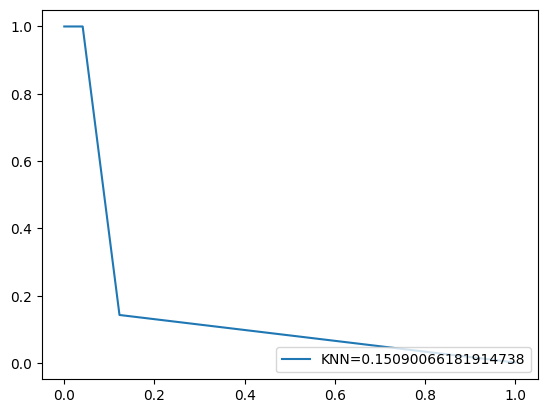

<Figure size 500x500 with 0 Axes>

Elapsed time test :  26.6394724000711


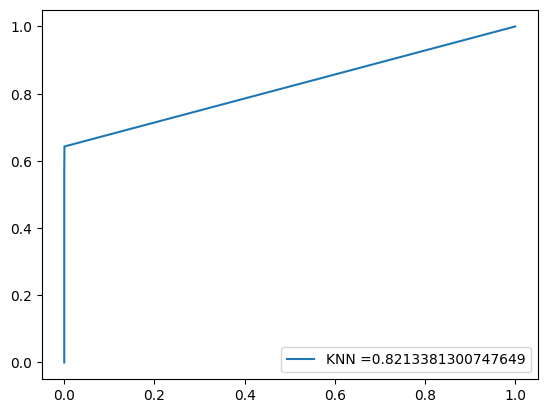

<Figure size 500x500 with 0 Axes>

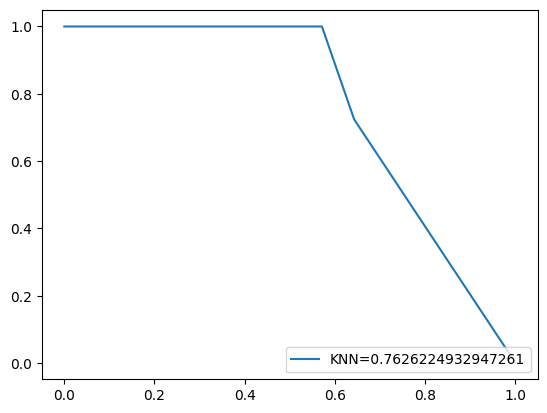

<Figure size 500x500 with 0 Axes>

Elapsed time test :  5.074645500164479


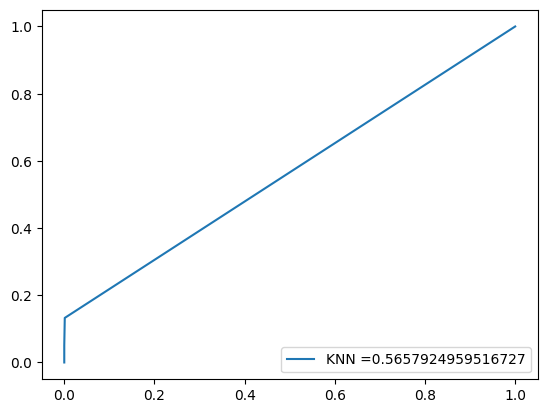

<Figure size 500x500 with 0 Axes>

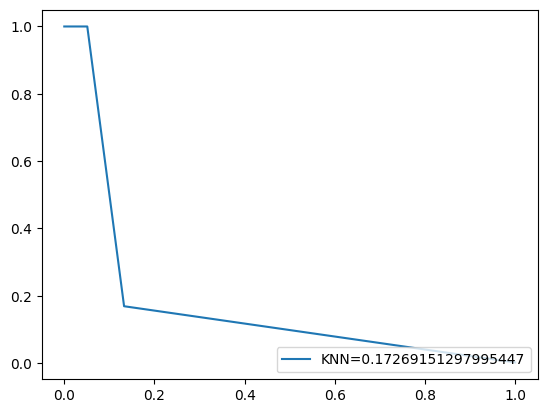

<Figure size 500x500 with 0 Axes>

Elapsed time test :  24.60161120002158


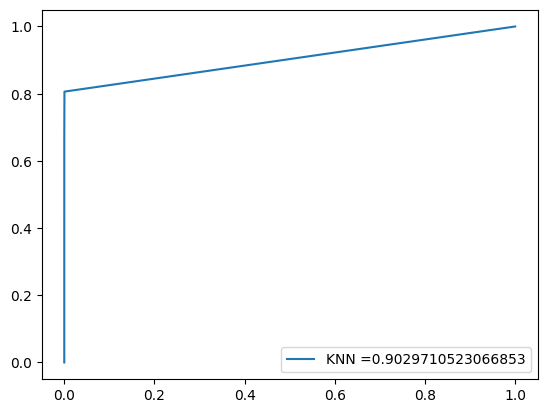

<Figure size 500x500 with 0 Axes>

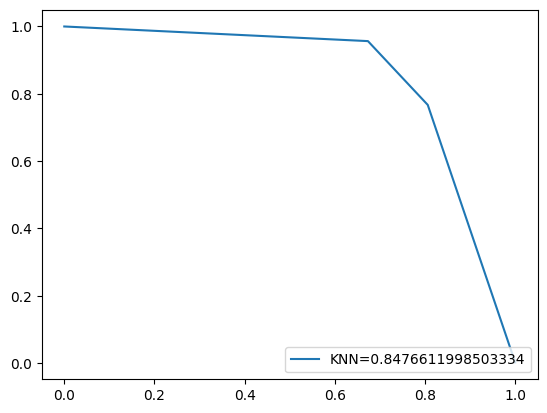

<Figure size 500x500 with 0 Axes>

1115.0627136002295
322.44389949948527
shape               V2        V3        V5        V9       V10       V11       V13  \
223361 -0.380783 -0.315013 -0.509374  1.054560 -0.030441  0.624996  1.255790   
165061 -0.626943  1.555339 -0.107769  0.040378  0.611115 -1.945070  1.060888   
238186  0.820566 -0.561351  1.080399 -0.131275 -0.638222  0.521931 -1.008237   
150562  1.014587  1.750679  0.500089  0.371579  0.560595 -0.855437  0.286872   
138452  1.897371 -0.429786 -0.855751  0.536044  1.221746  0.472626  0.777603   
...          ...       ...       ...       ...       ...       ...       ...   
119879  0.100792  0.490512 -0.296377 -0.114199  0.079128  1.585195 -0.476319   
259178  0.144023 -1.142399  1.940358  0.400697 -0.654029 -0.421422 -0.041877   
131932  0.992946  1.524591  0.349308 -0.491303 -0.212753 -0.382362  0.331641   
146867  2.354849 -2.521201  1.866302  0.580199 -0.027572 -0.418939 -0.294107   
121958 -0.784851  0.386784 -1.034018 -0.749637  0.543016 -0.546288  0.903848

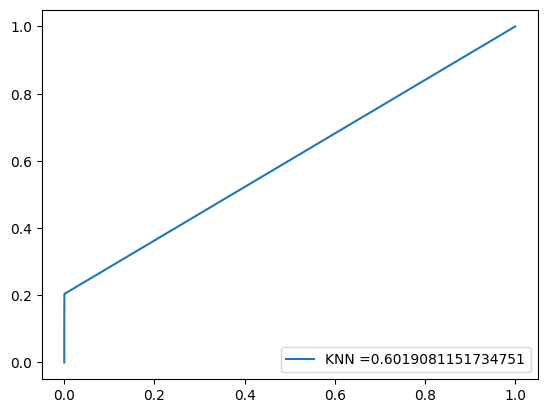

<Figure size 500x500 with 0 Axes>

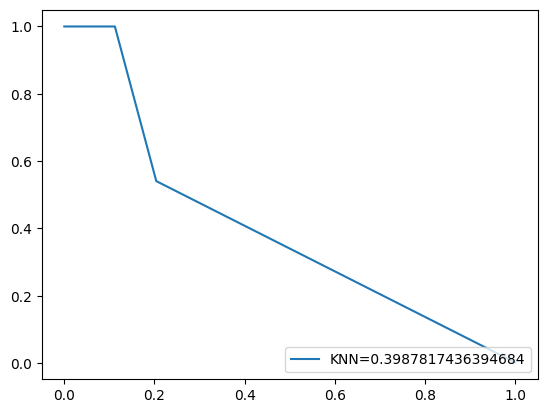

<Figure size 500x500 with 0 Axes>

Elapsed time test :  38.832260200055316


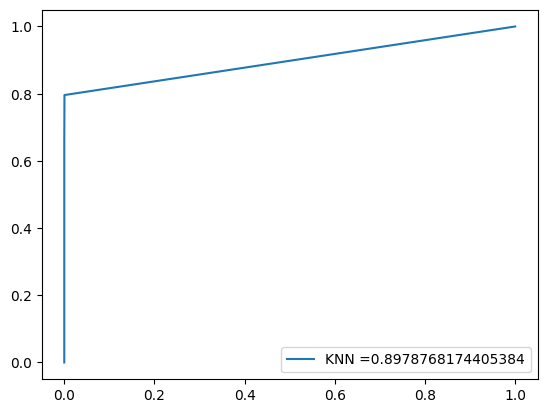

<Figure size 500x500 with 0 Axes>

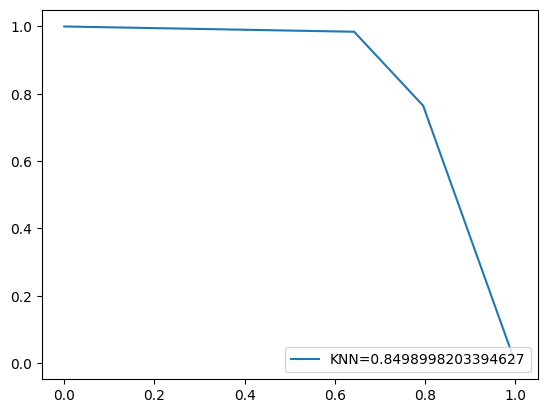

<Figure size 500x500 with 0 Axes>

Elapsed time test :  104.70643609995022


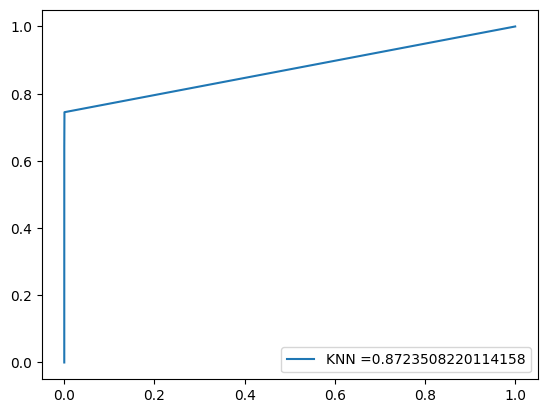

<Figure size 500x500 with 0 Axes>

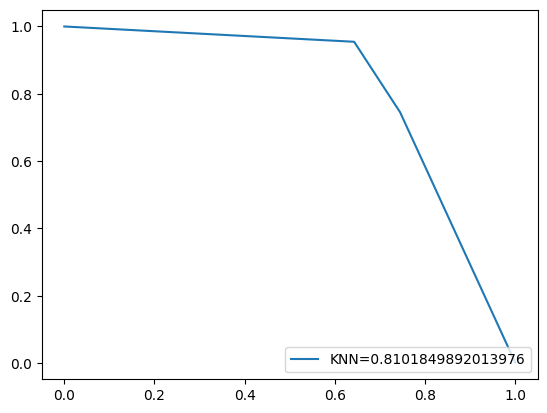

<Figure size 500x500 with 0 Axes>

Elapsed time test :  58.51037349994294


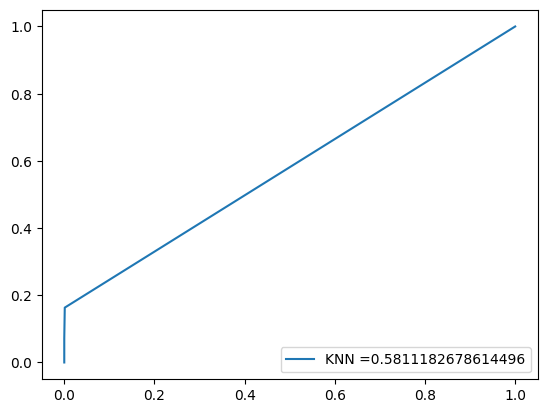

<Figure size 500x500 with 0 Axes>

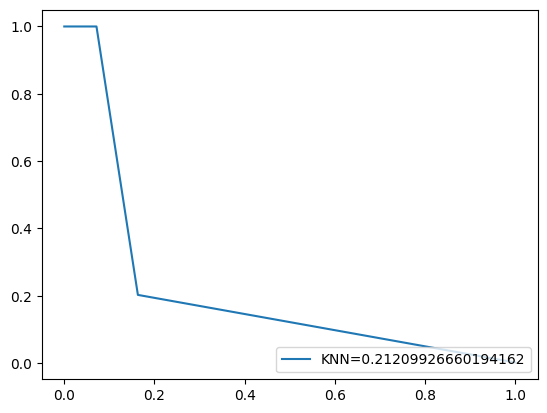

<Figure size 500x500 with 0 Axes>

Elapsed time test :  7.91797409998253


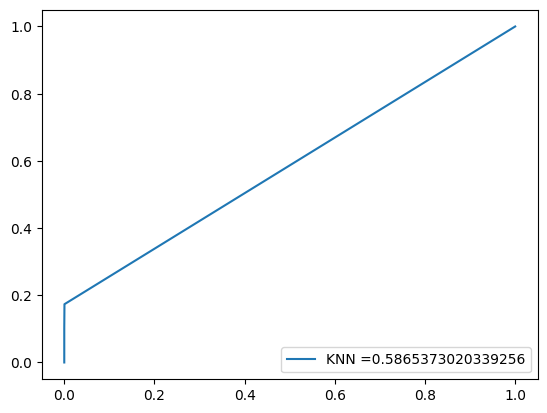

<Figure size 500x500 with 0 Axes>

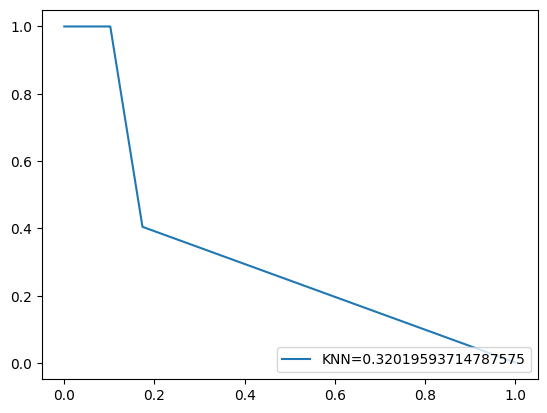

<Figure size 500x500 with 0 Axes>

Elapsed time test :  55.14972460013814


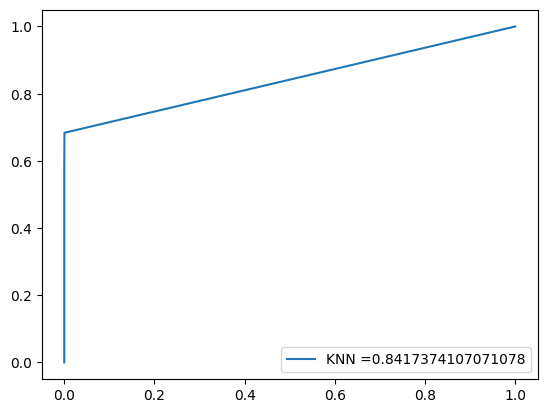

<Figure size 500x500 with 0 Axes>

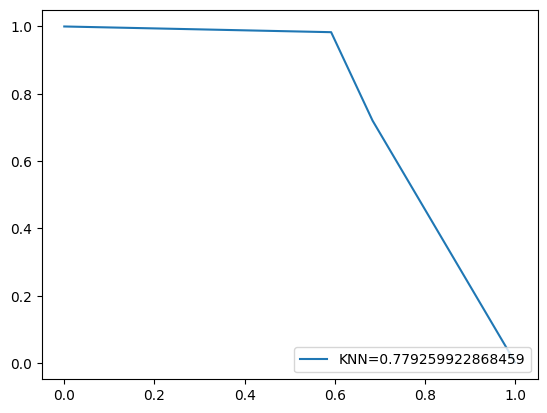

<Figure size 500x500 with 0 Axes>

Elapsed time test :  71.11398279992864


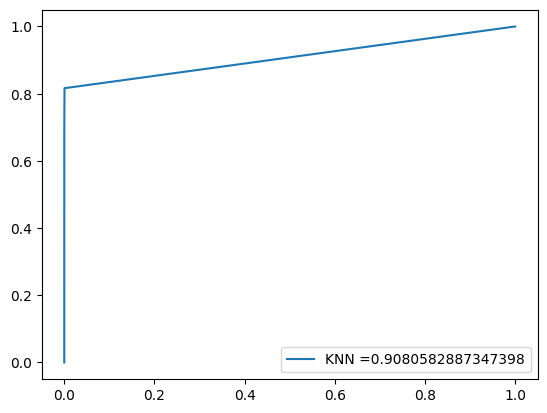

<Figure size 500x500 with 0 Axes>

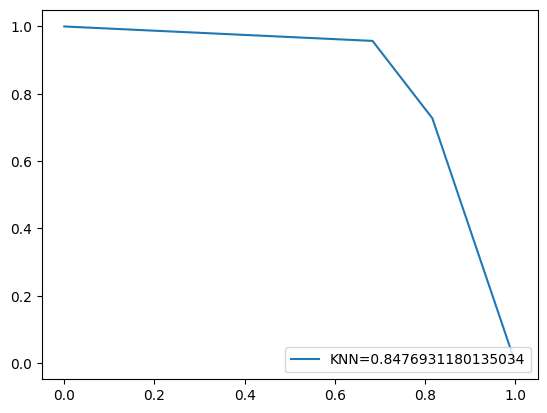

<Figure size 500x500 with 0 Axes>

Elapsed time test :  36.37887279991992


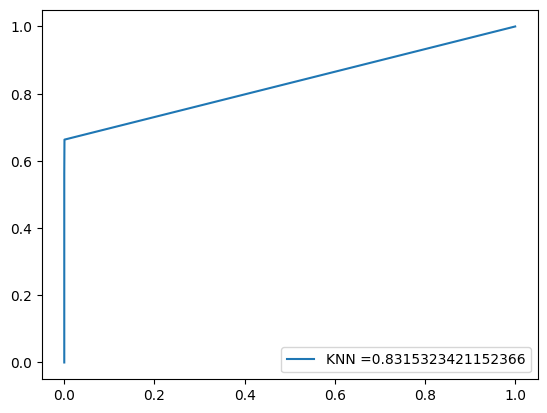

<Figure size 500x500 with 0 Axes>

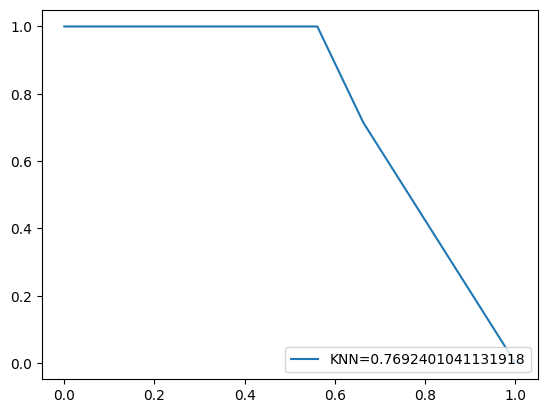

<Figure size 500x500 with 0 Axes>

Elapsed time test :  55.61296289996244


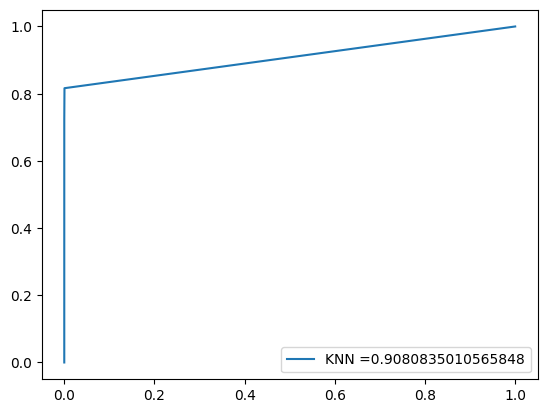

<Figure size 500x500 with 0 Axes>

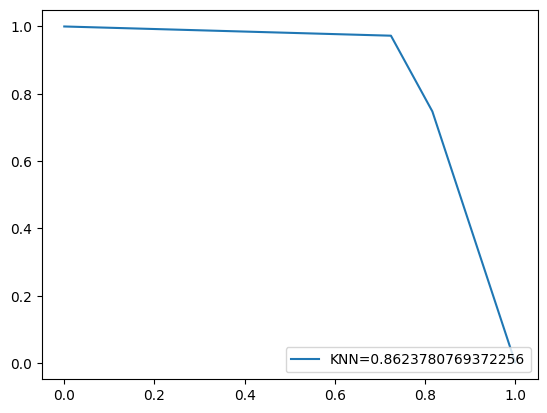

<Figure size 500x500 with 0 Axes>

Elapsed time test :  55.57551470003091


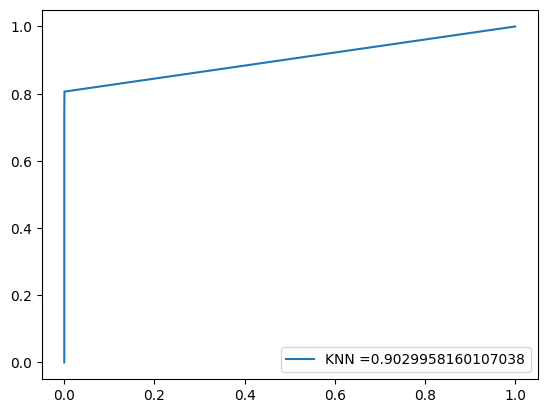

<Figure size 500x500 with 0 Axes>

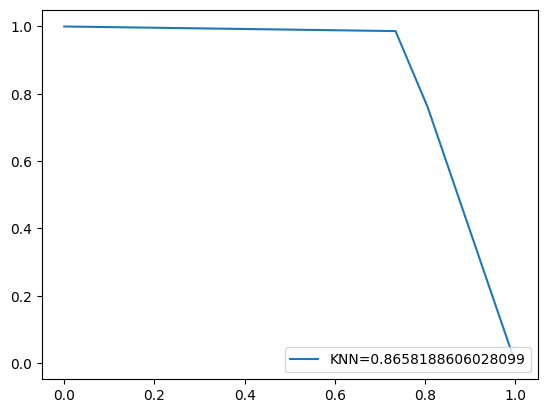

<Figure size 500x500 with 0 Axes>

Elapsed time test :  74.0095315000508


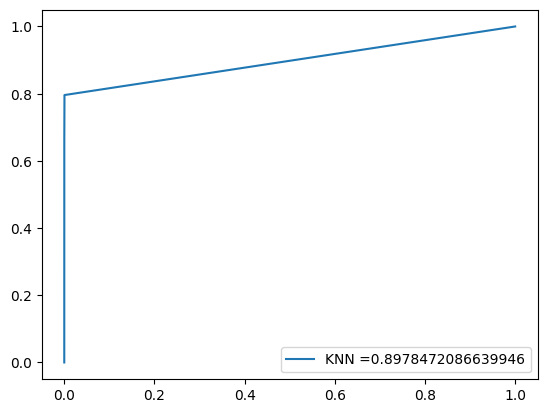

<Figure size 500x500 with 0 Axes>

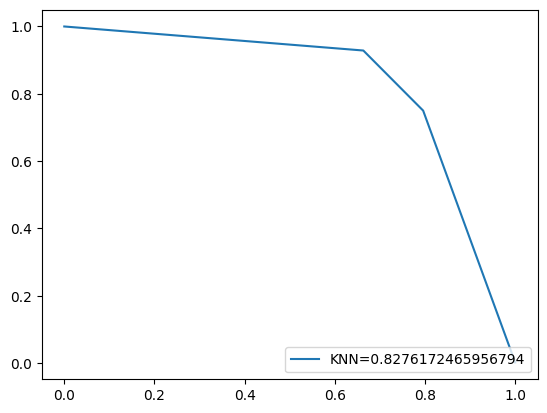

<Figure size 500x500 with 0 Axes>

Elapsed time test :  58.686428599990904


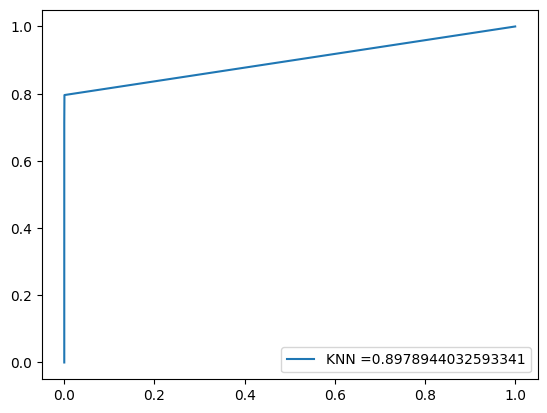

<Figure size 500x500 with 0 Axes>

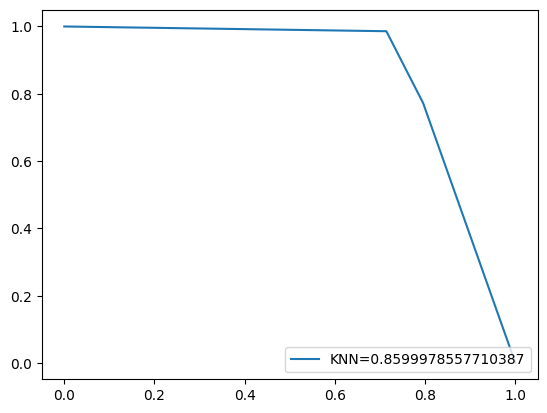

<Figure size 500x500 with 0 Axes>

Elapsed time test :  39.013501999899745


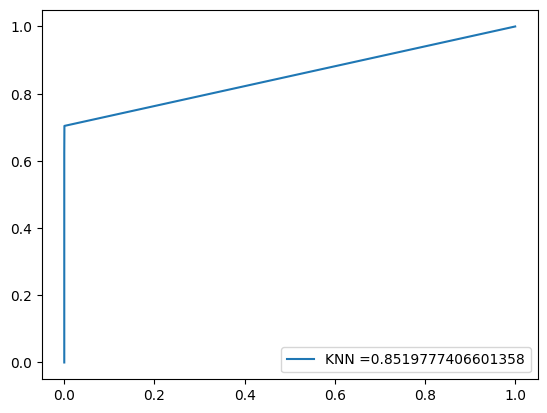

<Figure size 500x500 with 0 Axes>

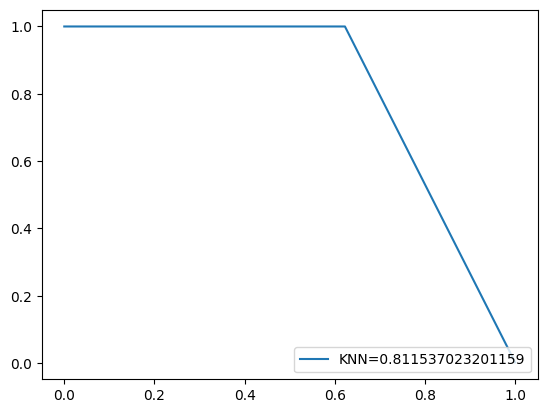

<Figure size 500x500 with 0 Axes>

Elapsed time test :  34.45694250008091


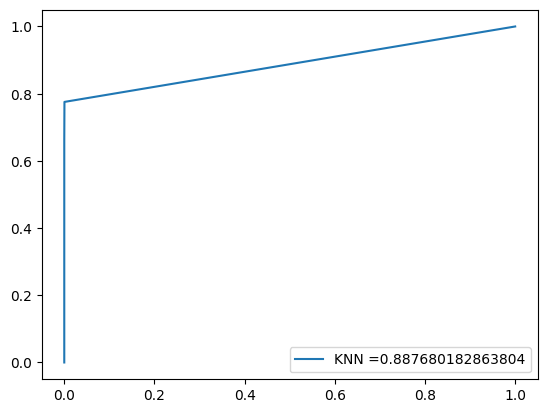

<Figure size 500x500 with 0 Axes>

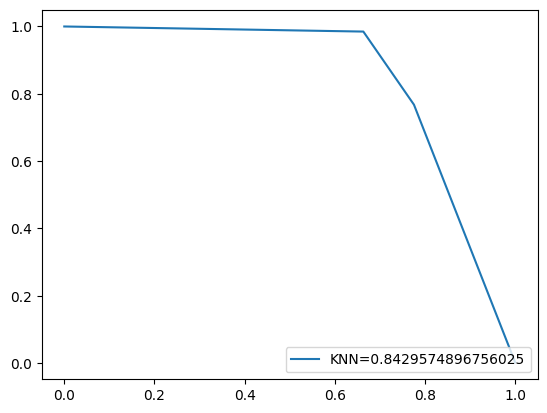

<Figure size 500x500 with 0 Axes>

Elapsed time test :  55.69297510012984


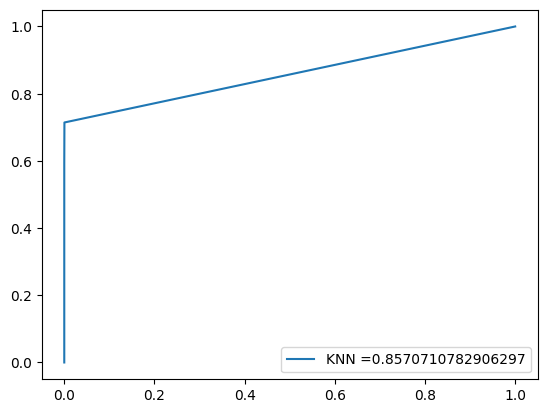

<Figure size 500x500 with 0 Axes>

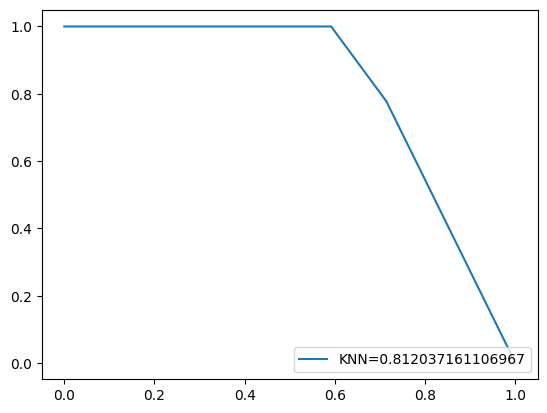

<Figure size 500x500 with 0 Axes>

2428.7377902993467
769.9466818000656
shape               V1        V4        V7        V8       V10       V11       V13  \
223361  1.955041  0.330155 -0.627978  0.035994 -0.030441  0.624996  1.255790   
165061 -0.400975 -2.017772  0.017959 -0.401619  0.611115 -1.945070  1.060888   
238186  0.072509 -0.709897  0.787858  0.117276 -0.638222  0.521931 -1.008237   
150562 -0.535045  2.769390  0.847902 -0.081323  0.560595 -0.855437  0.286872   
138452 -4.026938 -0.029571 -0.435632  1.313760  1.221746  0.472626  0.777603   
...          ...       ...       ...       ...       ...       ...       ...   
119879  1.173488  0.461596 -0.165254  0.119221  0.079128  1.585195 -0.476319   
259178 -0.775981 -1.241113 -0.466107  1.360620 -0.654029 -0.421422 -0.041877   
131932 -0.146609  0.485774  1.076640 -0.395316 -0.212753 -0.382362  0.331641   
146867 -2.948638 -3.798905 -0.471769  2.217537 -0.027572 -0.418939 -0.294107   
121958  1.233174 -0.698559 -0.502369 -0.188057  0.543016 -0.546288  0.903848 

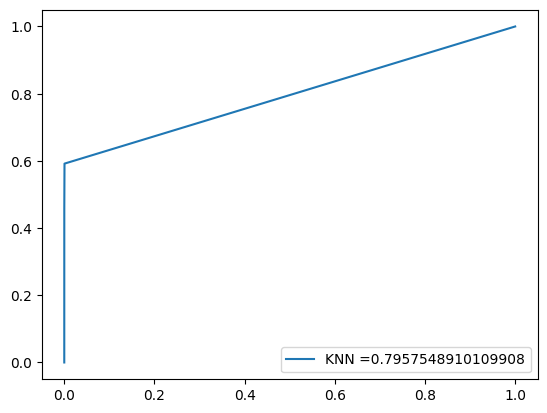

<Figure size 500x500 with 0 Axes>

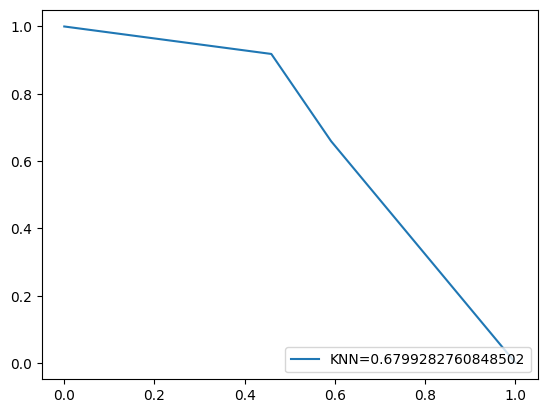

<Figure size 500x500 with 0 Axes>

Elapsed time test :  7.914611999876797


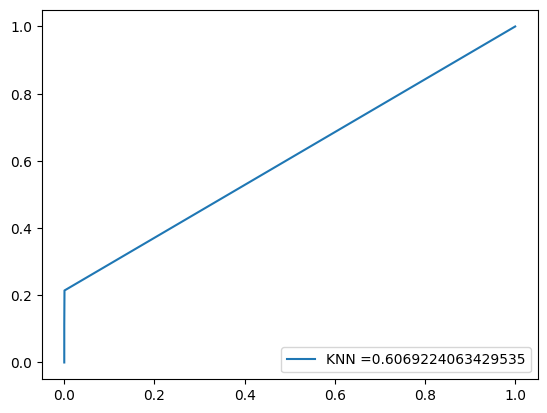

<Figure size 500x500 with 0 Axes>

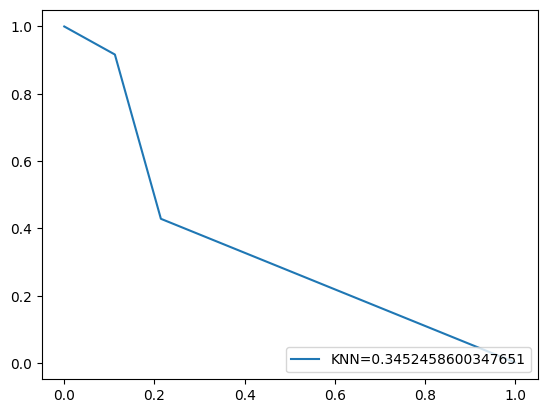

<Figure size 500x500 with 0 Axes>

Elapsed time test :  57.26477920007892


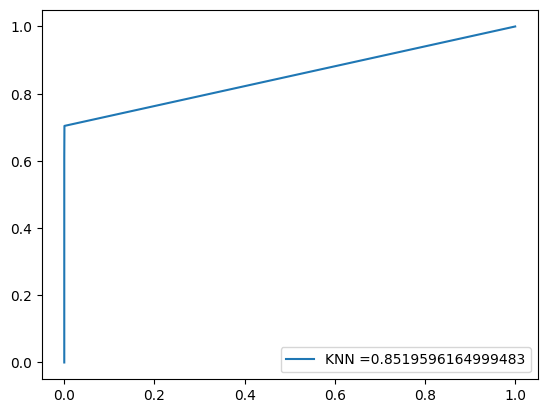

<Figure size 500x500 with 0 Axes>

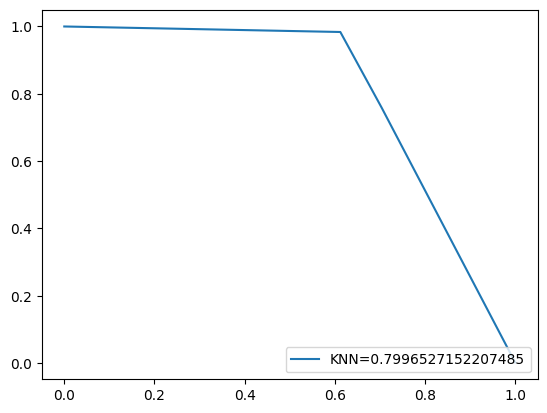

<Figure size 500x500 with 0 Axes>

Elapsed time test :  109.11164709995501


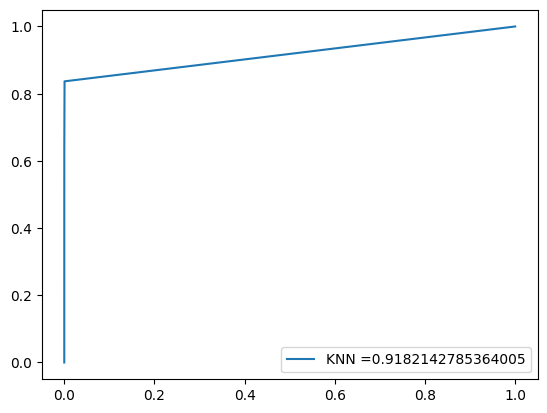

<Figure size 500x500 with 0 Axes>

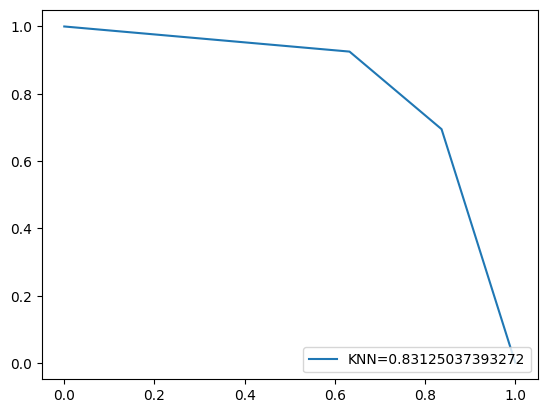

<Figure size 500x500 with 0 Axes>

Elapsed time test :  57.54066259996034


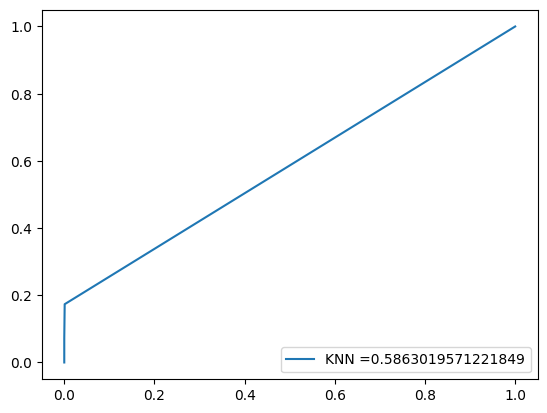

<Figure size 500x500 with 0 Axes>

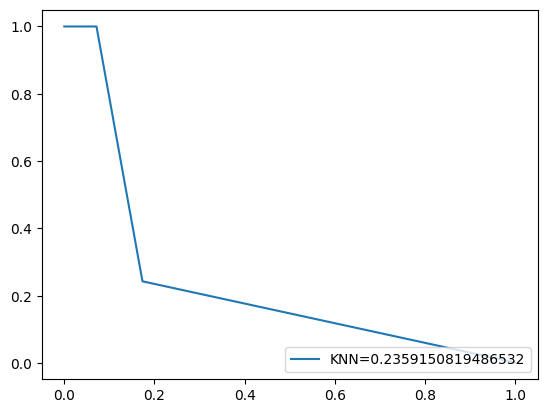

<Figure size 500x500 with 0 Axes>

Elapsed time test :  7.26338000013493


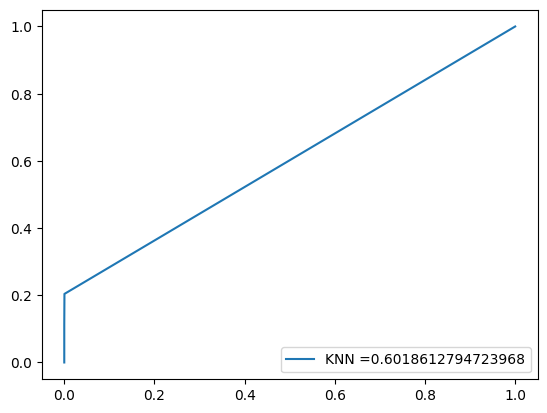

<Figure size 500x500 with 0 Axes>

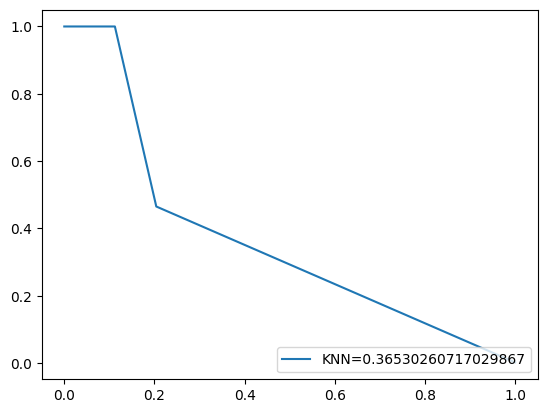

<Figure size 500x500 with 0 Axes>

Elapsed time test :  8.396586999995634


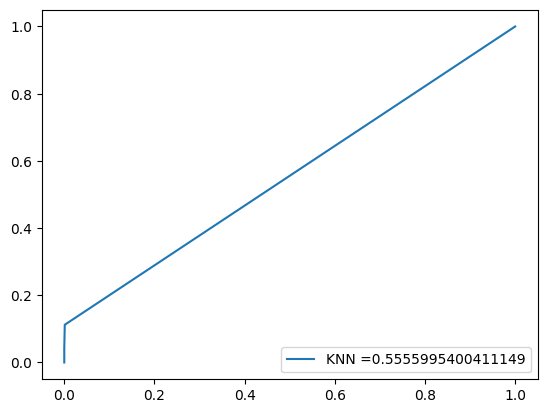

<Figure size 500x500 with 0 Axes>

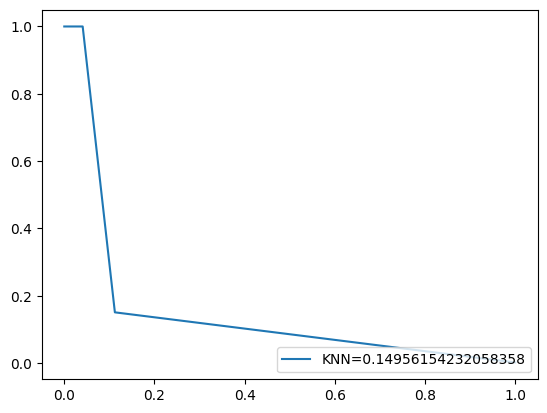

<Figure size 500x500 with 0 Axes>

Elapsed time test :  48.4632941999007


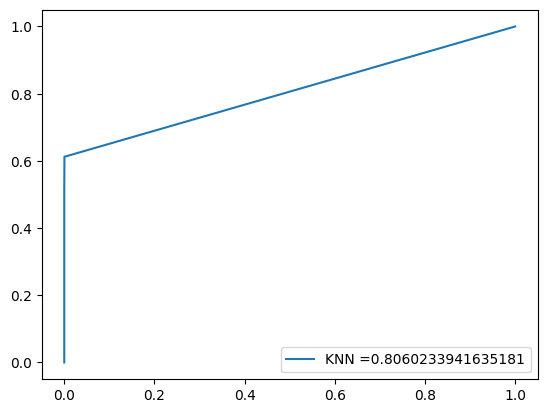

<Figure size 500x500 with 0 Axes>

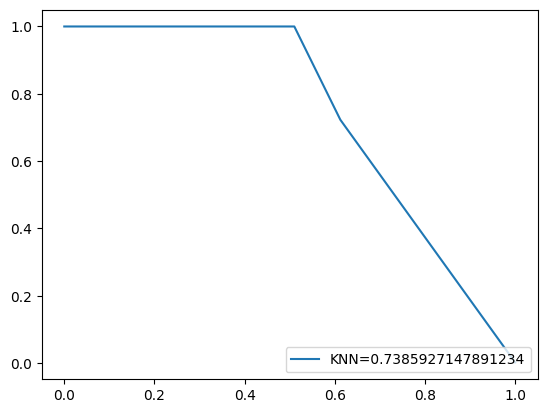

<Figure size 500x500 with 0 Axes>

Elapsed time test :  57.50517199980095


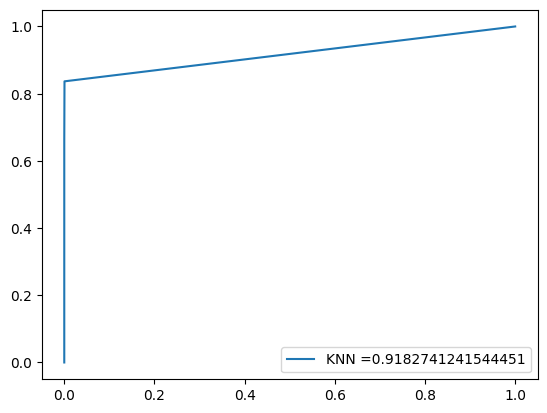

<Figure size 500x500 with 0 Axes>

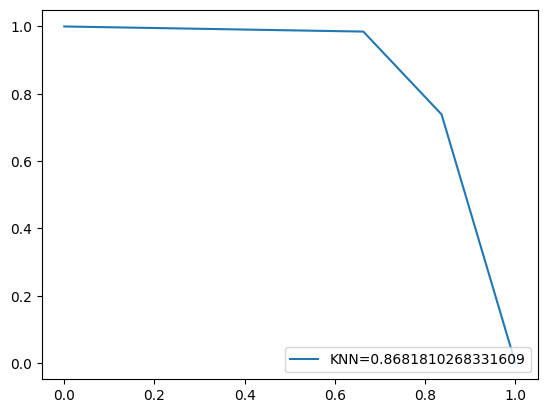

<Figure size 500x500 with 0 Axes>

Elapsed time test :  70.07815920002759


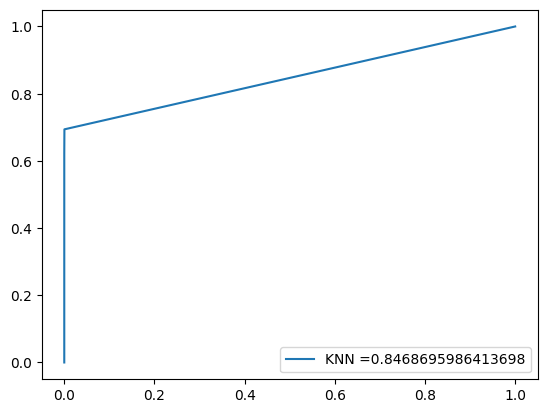

<Figure size 500x500 with 0 Axes>

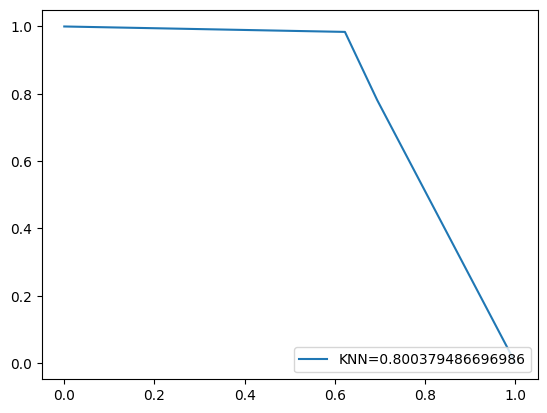

<Figure size 500x500 with 0 Axes>

Elapsed time test :  35.70086450013332


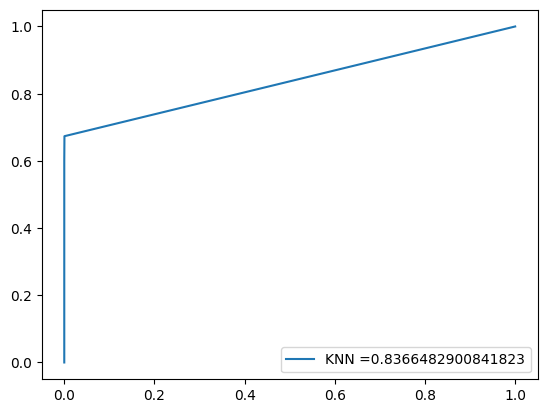

<Figure size 500x500 with 0 Axes>

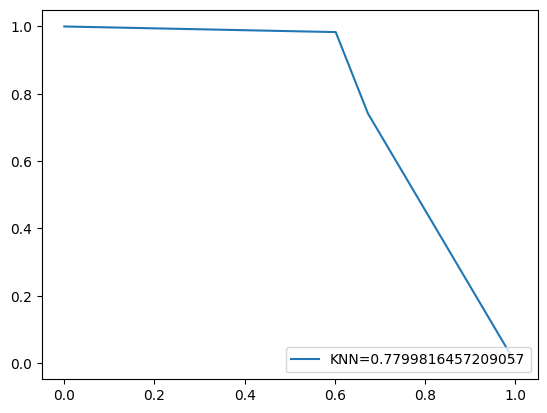

<Figure size 500x500 with 0 Axes>

Elapsed time test :  21.879897700157017


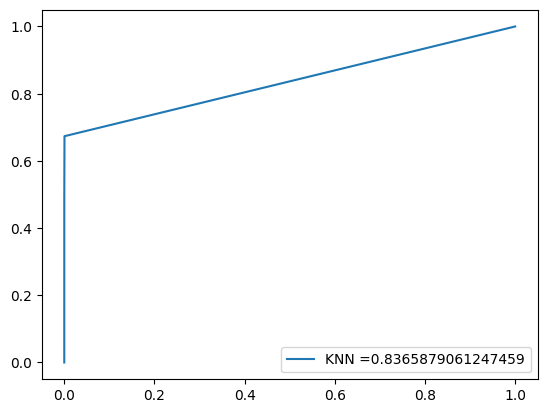

<Figure size 500x500 with 0 Axes>

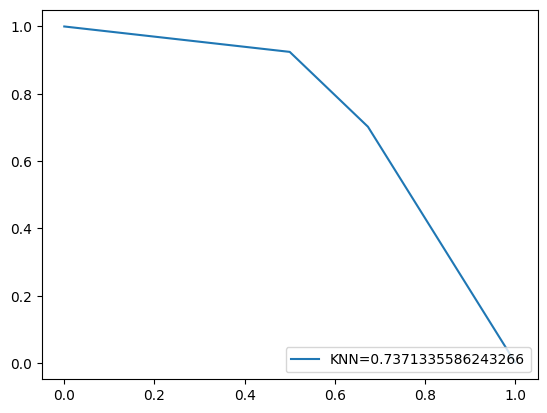

<Figure size 500x500 with 0 Axes>

Elapsed time test :  5.561367799993604


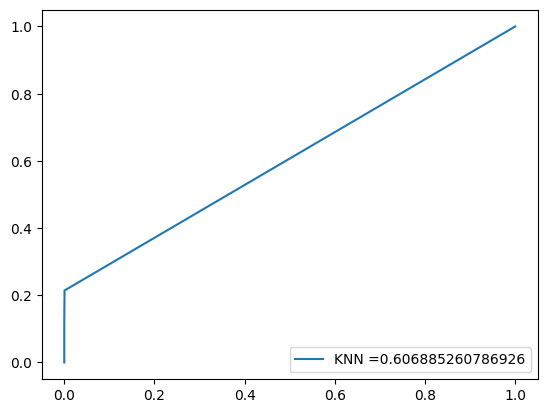

<Figure size 500x500 with 0 Axes>

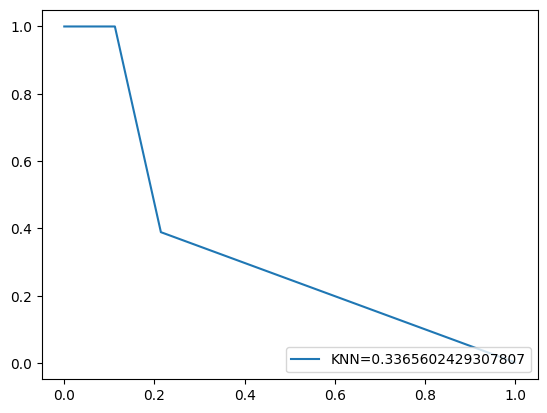

<Figure size 500x500 with 0 Axes>

Elapsed time test :  33.91963079990819


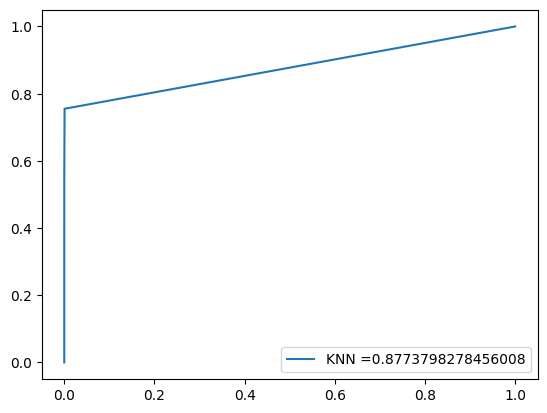

<Figure size 500x500 with 0 Axes>

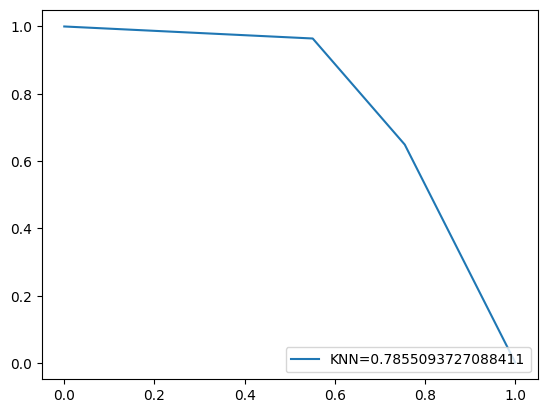

<Figure size 500x500 with 0 Axes>

Elapsed time test :  66.87112260004506


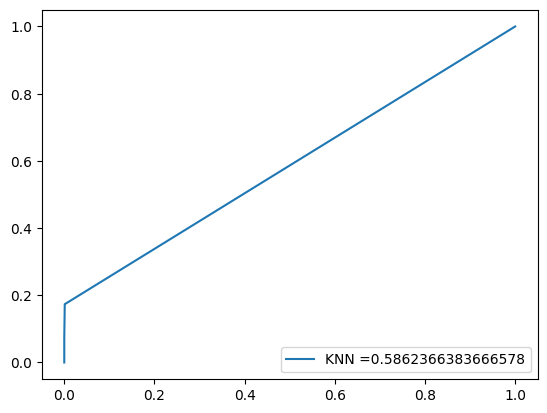

<Figure size 500x500 with 0 Axes>

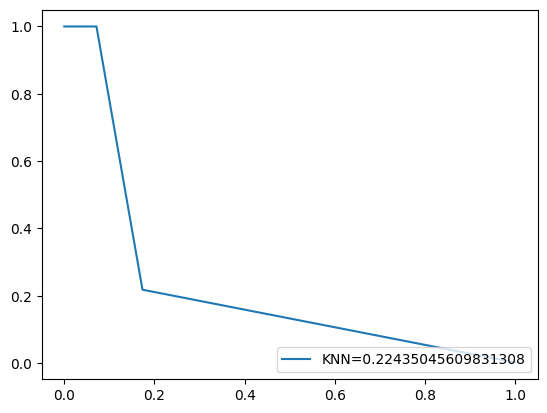

<Figure size 500x500 with 0 Axes>

2305.0099073001184
643.4548150999472
shape             Time        V1        V2        V3        V4        V5        V6  \
223361  143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
165061  117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
238186  149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
150562   93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
138452   82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
259178  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
131932   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
146867   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
121958   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028 

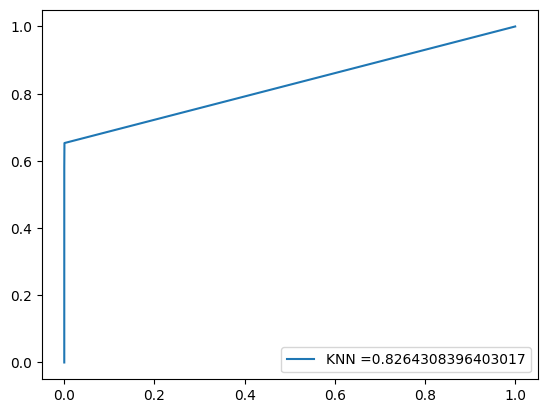

<Figure size 500x500 with 0 Axes>

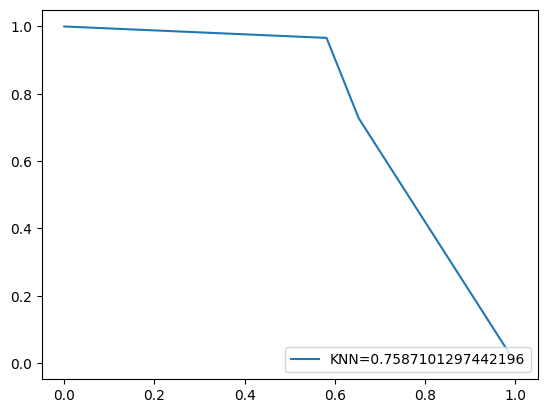

<Figure size 500x500 with 0 Axes>

Elapsed time test :  23.34786540013738


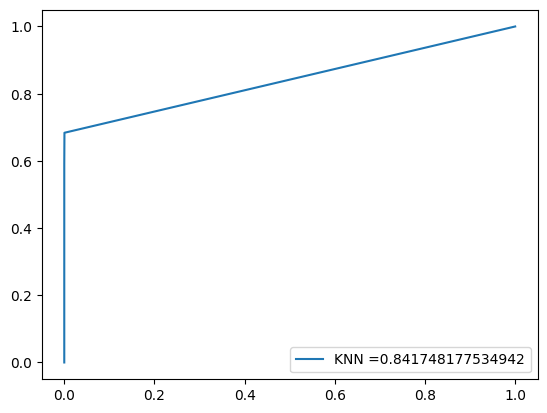

<Figure size 500x500 with 0 Axes>

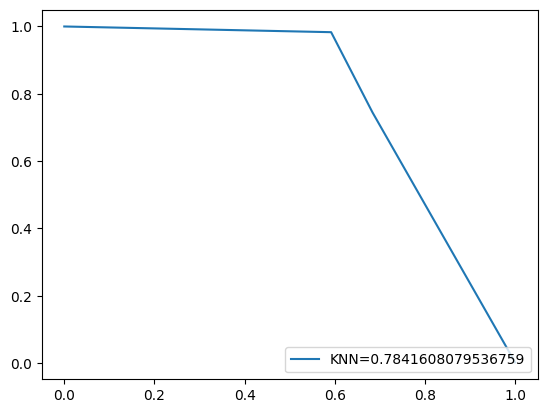

<Figure size 500x500 with 0 Axes>

Elapsed time test :  58.1439318000339


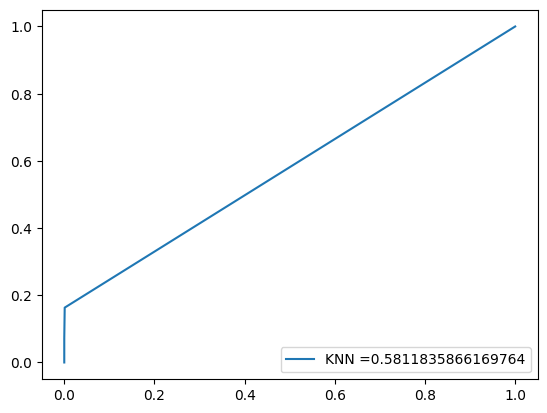

<Figure size 500x500 with 0 Axes>

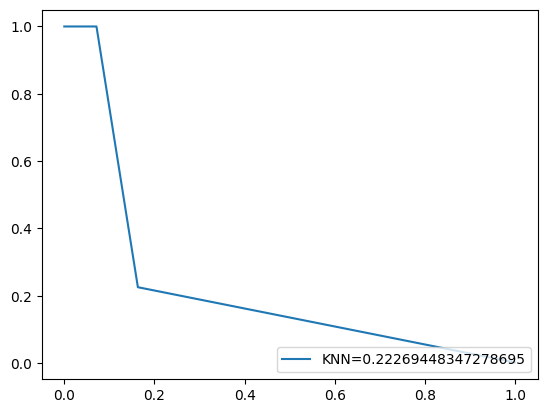

<Figure size 500x500 with 0 Axes>

Elapsed time test :  53.824503700016066


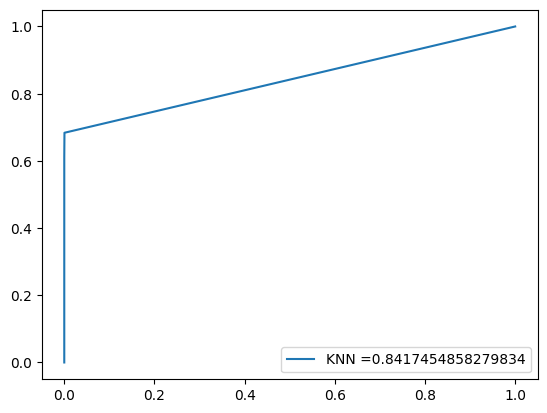

<Figure size 500x500 with 0 Axes>

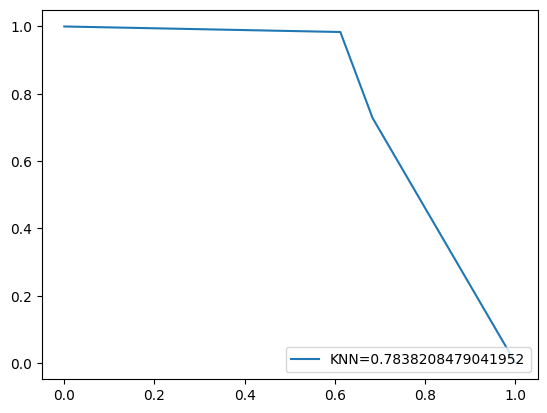

<Figure size 500x500 with 0 Axes>

Elapsed time test :  57.073963300092146


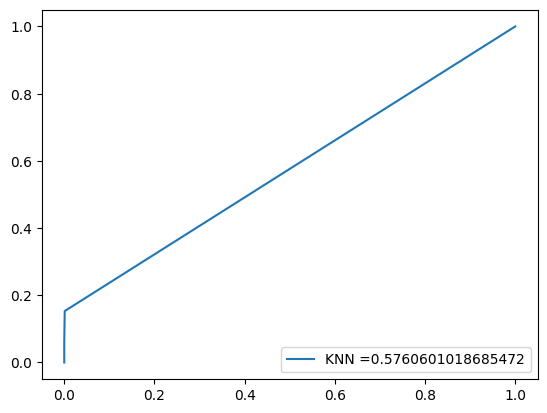

<Figure size 500x500 with 0 Axes>

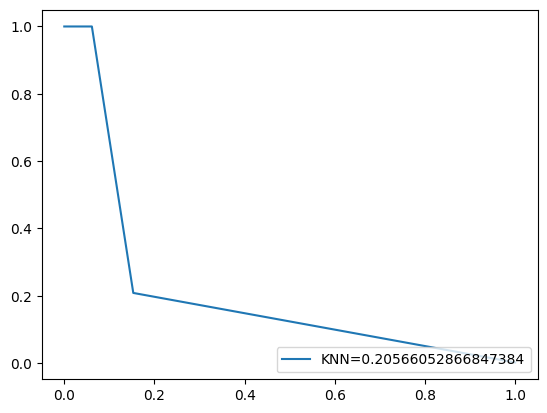

<Figure size 500x500 with 0 Axes>

Elapsed time test :  8.171135700074956


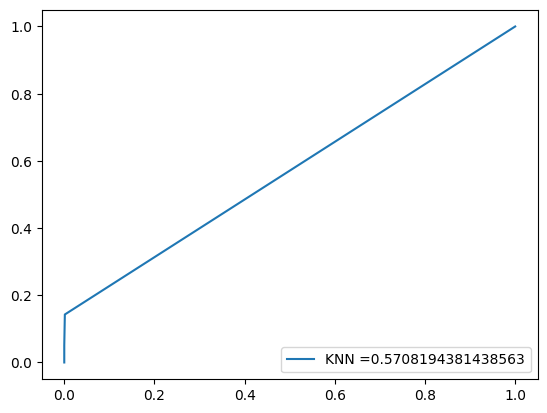

<Figure size 500x500 with 0 Axes>

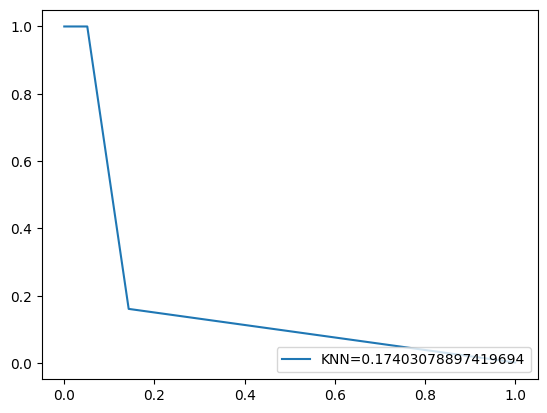

<Figure size 500x500 with 0 Axes>

Elapsed time test :  93.36494030011818


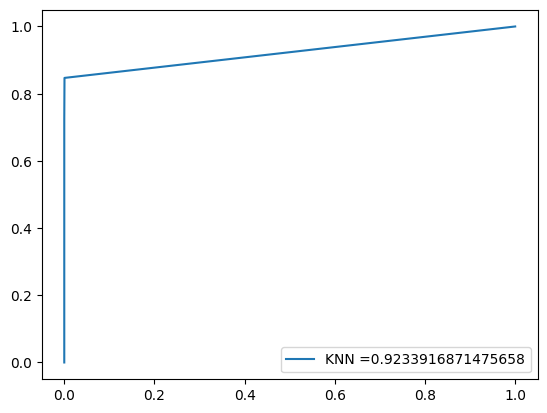

<Figure size 500x500 with 0 Axes>

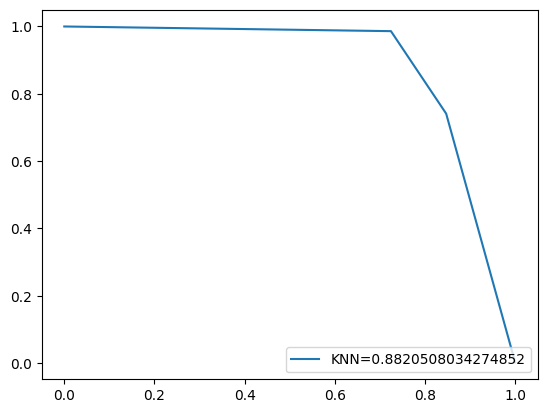

<Figure size 500x500 with 0 Axes>

Elapsed time test :  46.8707738998346


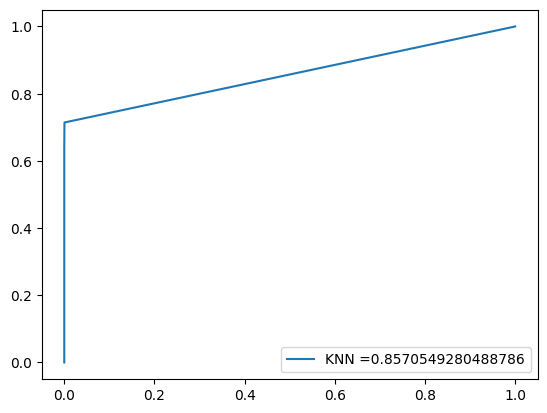

<Figure size 500x500 with 0 Axes>

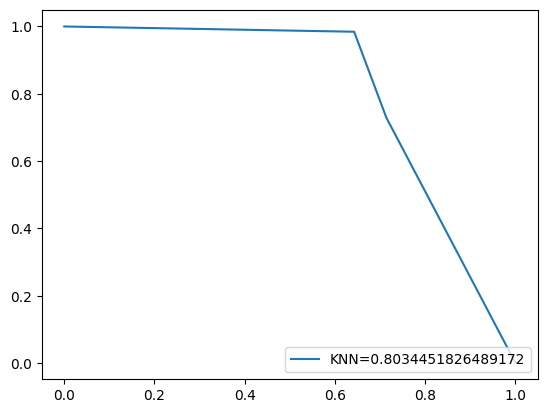

<Figure size 500x500 with 0 Axes>

Elapsed time test :  26.488068899838254


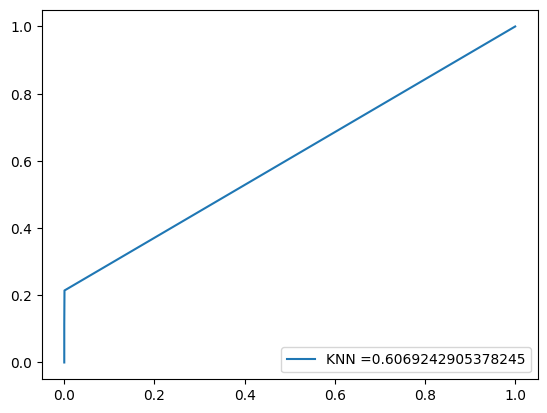

<Figure size 500x500 with 0 Axes>

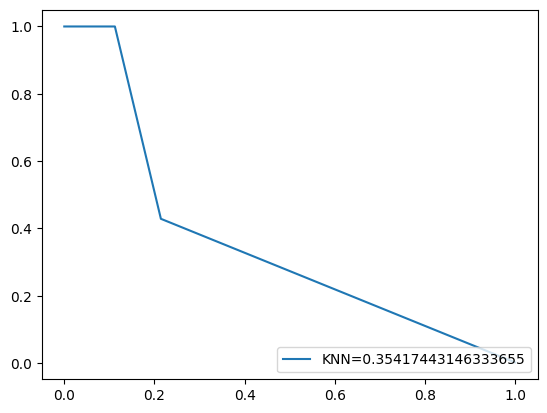

<Figure size 500x500 with 0 Axes>

Elapsed time test :  39.40513079985976


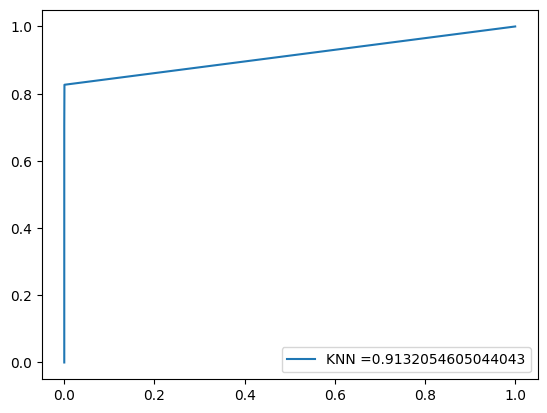

<Figure size 500x500 with 0 Axes>

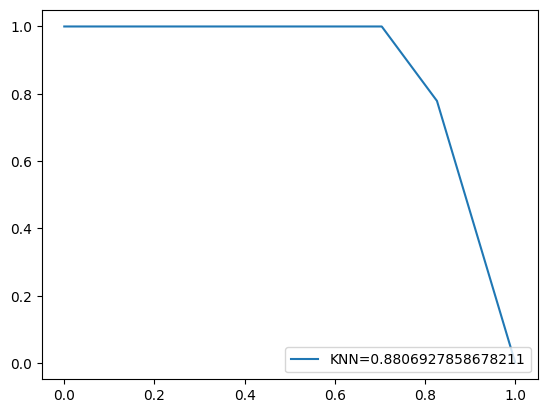

<Figure size 500x500 with 0 Axes>

Elapsed time test :  56.08470190013759


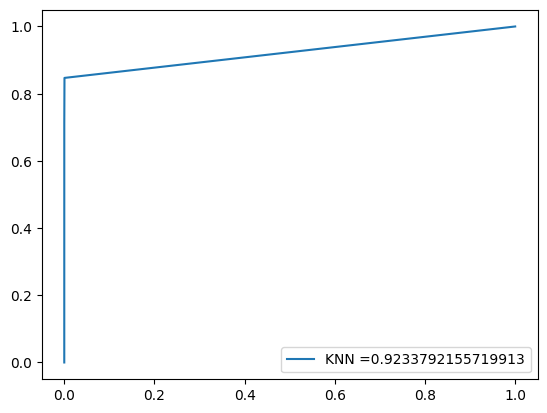

<Figure size 500x500 with 0 Axes>

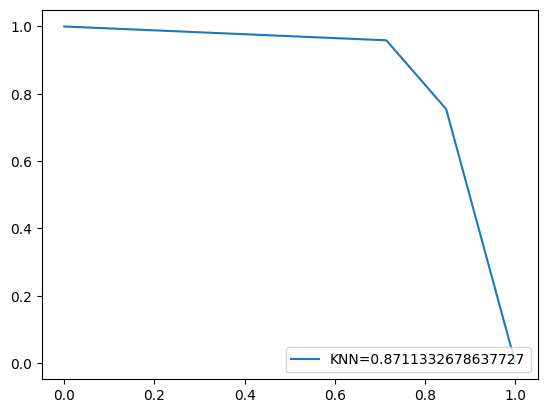

<Figure size 500x500 with 0 Axes>

Elapsed time test :  22.241088700015098


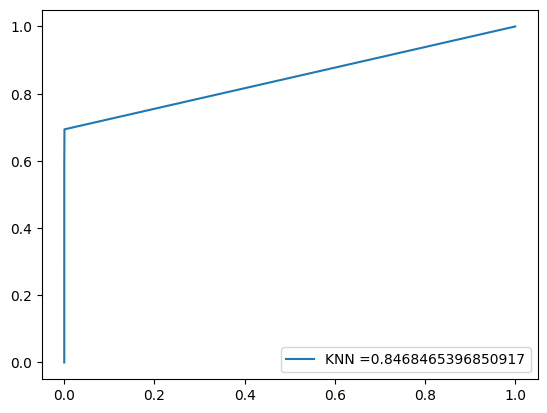

<Figure size 500x500 with 0 Axes>

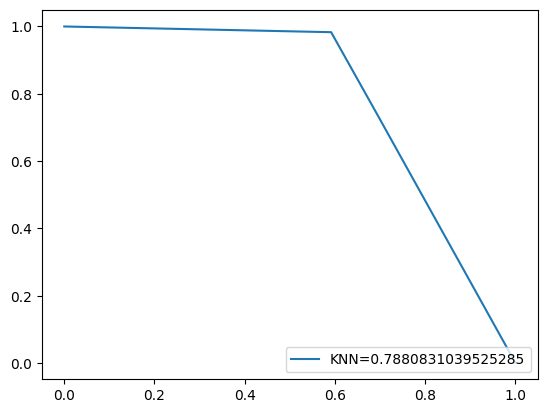

<Figure size 500x500 with 0 Axes>

Elapsed time test :  23.70308159990236


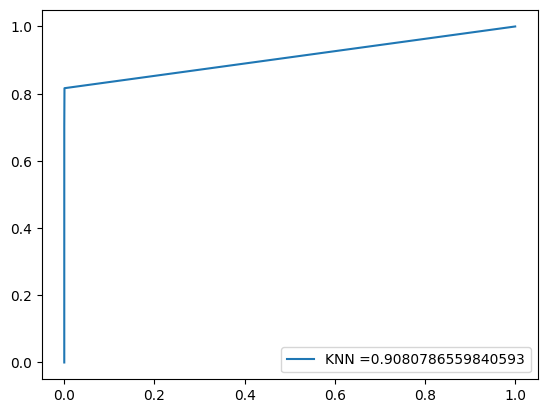

<Figure size 500x500 with 0 Axes>

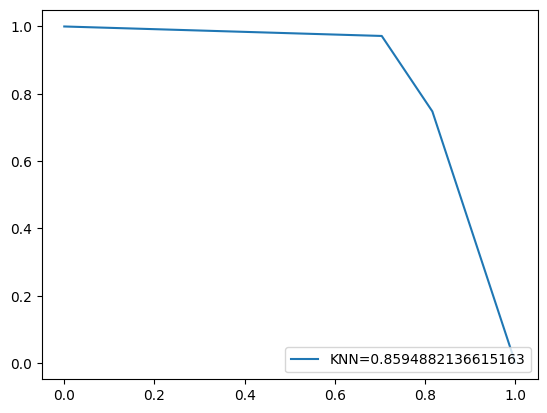

<Figure size 500x500 with 0 Axes>

Elapsed time test :  3.529043999966234


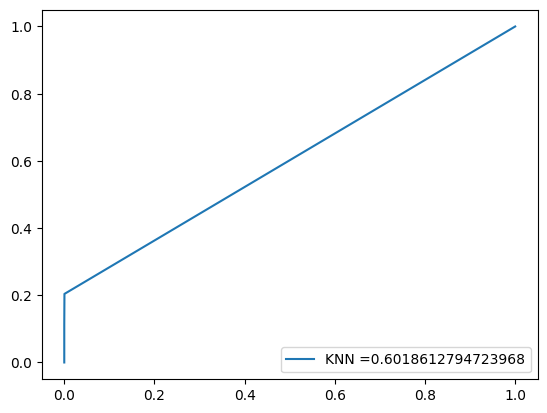

<Figure size 500x500 with 0 Axes>

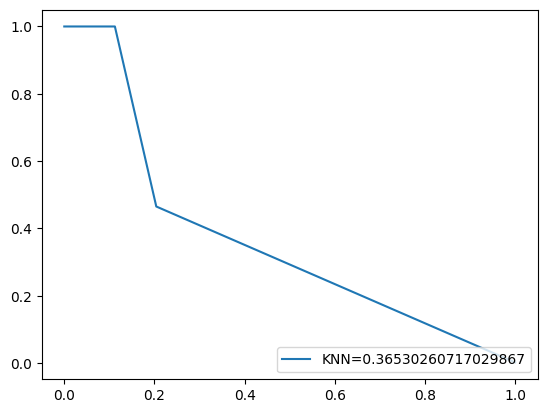

<Figure size 500x500 with 0 Axes>

Elapsed time test :  23.89435359998606


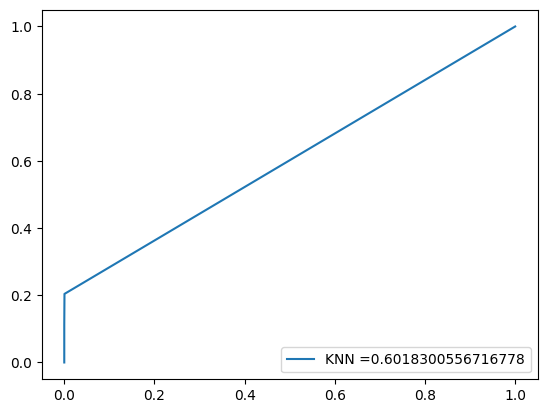

<Figure size 500x500 with 0 Axes>

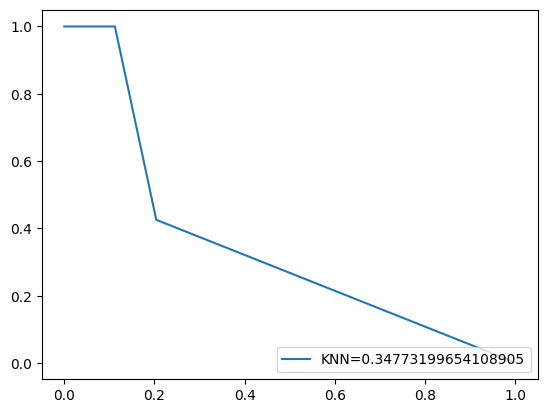

<Figure size 500x500 with 0 Axes>

5003.7525544001255
572.5251668000128
shape             Time        V1        V2        V4        V5        V6        V7  \
223361  143352.0  1.955041 -0.380783  0.330155 -0.509374 -0.086197 -0.627978   
165061  117173.0 -0.400975 -0.626943 -2.017772 -0.107769  0.168310  0.017959   
238186  149565.0  0.072509  0.820566 -0.709897  1.080399 -0.359429  0.787858   
150562   93670.0 -0.535045  1.014587  2.769390  0.500089  1.002270  0.847902   
138452   82655.0 -4.026938  1.897371 -0.029571 -0.855751 -0.480406 -0.435632   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.100792  0.461596 -0.296377 -0.213165 -0.165254   
259178  159000.0 -0.775981  0.144023 -1.241113  1.940358  3.912076 -0.466107   
131932   79795.0 -0.146609  0.992946  0.485774  0.349308 -0.815198  1.076640   
146867   87931.0 -2.948638  2.354849 -3.798905  1.866302  2.727695 -0.471769   
121958   76381.0  1.233174 -0.784851 -0.698559 -1.034018 -0.637028 -0.502369 

In [51]:
models = [#XGBClassifier(colsample_bytree= 1 , gamma = 1 , max_depth= 10, min_child_weight= 3, n_estimators=100, reg_alpha= 0, reg_lambda= 0, seed= 0)
          #CatBoostClassifier()
    #MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (10, 30, 10), learning_rate= 'adaptive', solver='adam')
              #LogisticRegression(max_iter = 100)
          #DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 7, min_samples_split= 3)
    KNeighborsClassifier(n_neighbors= 2,metric='minkowski',weights='uniform',algorithm='auto',leaf_size=2)
    #BernoulliNB(binarize=0.0)
          #RandomForestClassifier(n_jobs=4,random_state=2018,criterion='gini',n_estimators=100,verbose=False)
             # MLPClassifier(hidden_layer_sizes=(200,)),
                            # max_iter=10000),svm.SVC()
        ]
for sx in models:
   # X_train,X_test, Y_train, Y_test = split(X,Y)
    chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(sx,X,Y,size=10,n_feat=X.shape[1],n_parents=10,mutation_rate=0.70,n_gen=5,
                         X_train = X,X_test = X_test,Y_train = Y,Y_test = Y_test)
    
   # print(chromo_df_bc)
    print(score_bc)
    
    print(best_precission)
    
    print(best_recall)
    
    print(best_f1call)
    
    '''y_pred_proba_dt = sx.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)'''
    

TypeError: LogisticRegression.predict_proba() missing 1 required positional argument: 'X'

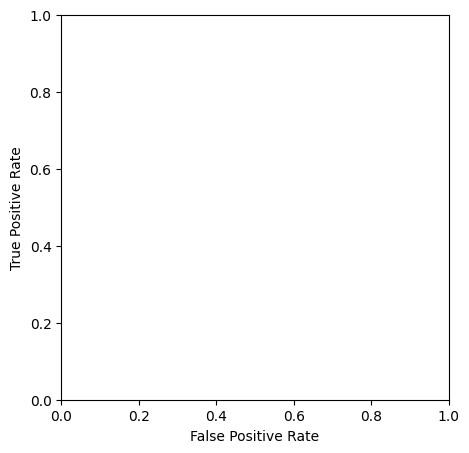

In [17]:
    plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    y_pred_proba_dt = LogisticRegression.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    '''plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="Decisiontree ="+str(auc_dt))
    plt.plot(fpr_xb,tpr_xb,linestyle='dotted',label="XGBoost ="+str(auc_xb))
    plt.plot(fpr_rf,tpr_rf,linestyle='dashed',label="Randomforesttree ="+str(auc_rf))
    plt.plot(fpr_ann,tpr_ann,linestyle='-.',label="ANN ="+str(auc_ann))
    plt.plot(fpr_knn,tpr_knn,linestyle='dashdot',label="KNN ="+str(auc_knn))
    plt.plot(fpr_cb,tpr_cb,linestyle=':',label="CatBoost ="+str(auc_cb))'''
    plt.legend(loc=4)
    plt.show()

In [ ]:
performance_metric=['score_bc',"best_precission","best_recall","best_f1call"]
lr:
[0.9992977752242331, 0.9992764956855735, 0.9992658559162437, 0.9992871354549033, 0.9992764956855735]
[0.8738738738738738, 0.8715596330275229, 0.8636363636363636, 0.8867924528301887, 0.8785046728971962]
[0.6510067114093959, 0.6375838926174496, 0.6375838926174496, 0.6308724832214765, 0.6308724832214765]
[0.7461538461538462, 0.7364341085271318, 0.7335907335907336, 0.7372549019607842, 0.7343749999999999]
dt:
[0.9993084149935629, 0.9992658559162437, 0.9993084149935629, 0.9992871354549033, 0.9992552161469139]
[0.7763157894736842, 0.7702702702702703, 0.7916666666666666, 0.7697368421052632, 0.7548387096774194]
[0.7919463087248322, 0.7651006711409396, 0.7651006711409396, 0.785234899328859, 0.785234899328859]
[0.7840531561461794, 0.7676767676767677, 0.7781569965870307, 0.7774086378737541, 0.7697368421052633]
knn:
[0.9994786513028397, 0.9995956887654676, 0.9995531296881484, 0.999521210380159, 0.9996382478427868]
[0.890625, 0.9302325581395349, 0.9421487603305785, 0.9193548387096774, 0.9752066115702479]
[0.7651006711409396, 0.8053691275167785, 0.7651006711409396, 0.7651006711409396, 0.7919463087248322]
[0.8231046931407943, 0.8633093525179855, 0.8444444444444444, 0.8351648351648351, 0.8740740740740741]
nb:
[0.9992020173002649, 0.9991488184536159, 0.9989785821443391, 0.9990637002989775, 0.9991381786842861]
[0.8135593220338984, 0.8, 0.7912087912087912, 0.7904761904761904, 0.7982456140350878]
[0.6442953020134228, 0.6174496644295302, 0.48322147651006714, 0.5570469798657718, 0.610738255033557]
[0.7191011235955057, 0.6969696969696969, 0.6, 0.6535433070866142, 0.6920152091254754]
rf:
[0.999627608073457, 0.9996169683041272, 0.9996382478427868, 0.9996488876121166, 0.999627608073457]
[0.9523809523809523, 0.937984496124031, 0.96, 0.9603174603174603, 0.975]
[0.8053691275167785, 0.8120805369127517, 0.8053691275167785, 0.8120805369127517, 0.785234899328859]
[0.8727272727272727, 0.8705035971223022, 0.8759124087591241, 0.8800000000000001, 0.8698884758364313]
ann:
[0.9995637694574782, 0.9994467319948503, 0.9995424899188186, 0.9994892910721696, 0.9995637694574782]
[0.9153846153846154, 0.875968992248062, 0.8955223880597015, 0.8581560283687943, 0.9153846153846154]
[0.7986577181208053, 0.7583892617449665, 0.8053691275167785, 0.8120805369127517, 0.7986577181208053]
[0.8530465949820788, 0.8129496402877697, 0.8480565371024734, 0.8344827586206897, 0.8530465949820788]
xgboost:
[0.9995962220427653, 0.9996313331694814, 0.9996137776061234, 0.9996137776061234, 0.9995786664794073]
[0.987012987012987, 0.9873417721518988, 0.9871794871794872, 0.9871794871794872, 0.9512195121951219]
[0.7755102040816326, 0.7959183673469388, 0.7857142857142857, 0.7857142857142857, 0.7959183673469388]
[0.8685714285714285, 0.8813559322033897, 0.8750000000000001, 0.8750000000000001, 0.8666666666666666]
CatBoost
[0.9996488887328394, 0.9996488887328394, 0.9997015554229135, 0.9996488887328394, 0.9996313331694814]
[0.9875, 0.975609756097561, 1.0, 0.9875, 0.9873417721518988]
[0.8061224489795918, 0.8163265306122449, 0.826530612244898, 0.8061224489795918, 0.7959183673469388]
[0.8876404494382023, 0.888888888888889, 0.9050279329608939, 0.8876404494382023, 0.8813559322033897]


In [ ]:
xgboost:
[0.9995962220427653, 0.9996313331694814, 0.9996137776061234, 0.9996137776061234, 0.9995786664794073]
[0.987012987012987, 0.9873417721518988, 0.9871794871794872, 0.9871794871794872, 0.9512195121951219]
[0.7755102040816326, 0.7959183673469388, 0.7857142857142857, 0.7857142857142857, 0.7959183673469388]
[0.8685714285714285, 0.8813559322033897, 0.8750000000000001, 0.8750000000000001, 0.8666666666666666]
CatBoost
[0.9996488887328394, 0.9996488887328394, 0.9997015554229135, 0.9996488887328394, 0.9996313331694814]
[0.9875, 0.975609756097561, 1.0, 0.9875, 0.9873417721518988]
[0.8061224489795918, 0.8163265306122449, 0.826530612244898, 0.8061224489795918, 0.7959183673469388]
[0.8876404494382023, 0.888888888888889, 0.9050279329608939, 0.8876404494382023, 0.8813559322033897]



In [ ]:
sub=['1','2','3','4','5']
#lr=[0.7461538461538462, 0.7364341085271318, 0.7335907335907336, 0.7372549019607842, 0.7343749999999999]
dt=[0.7840531561461794, 0.7676767676767677, 0.7781569965870307, 0.7774086378737541, 0.7697368421052633]
knn=[0.8231046931407943, 0.8633093525179855, 0.8444444444444444, 0.8351648351648351, 0.8740740740740741]
#nb=[0.9992020173002649, 0.9991488184536159, 0.9989785821443391, 0.9990637002989775, 0.9991381786842861]
rf=[0.8727272727272727, 0.8705035971223022, 0.8759124087591241, 0.8800000000000001, 0.8698884758364313]
ann=[0.8530465949820788, 0.8129496402877697, 0.8480565371024734, 0.8344827586206897, 0.8530465949820788]
xgboost=[0.8685714285714285, 0.8813559322033897, 0.8750000000000001, 0.8750000000000001, 0.8666666666666666]
catboost=[0.8876404494382023, 0.888888888888889, 0.9050279329608939, 0.8876404494382023, 0.8813559322033897]
#plt.plot(sub,lr,label='lr')
plt.plot(sub,dt,label='dt', marker = 'o')
plt.plot(sub,knn,label='knn', marker = 'o')
#plt.plot(sub,nb,label='nb')
plt.plot(sub,rf,label='rf',marker = 'o')
plt.plot(sub,ann,label='ann', marker = 'o')
plt.plot(sub,ann,label='xgboost', marker = 'o')
plt.plot(sub,ann,label='catboost', marker = 'o')
plt.xlabel('Generation')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [ ]:
score_bc=[0.9992977752242331, 0.9992764956855735, 0.9992658559162437, 0.9992871354549033, 0.9992764956855735]

In [ ]:
best_precission=[0.8429752066115702,
 0.8738738738738738,
 0.864406779661017,
 0.8727272727272727,
 0.8878504672897196]

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
plot(score_bc,best_precission,best_recall,best_f1call,0.6,1.0,c = "gold",d="blue",a="red",b="green")
#plot(best_precission,0.6,1.0,c = "b",d="Precision")
#plot(best_recall,0.6,1.0,c = "r",d="Recall")
#plot(best_f1call,0.6,1.0,c = "y",d="F1 Score")

In [ ]:
from sklearn import tree
classify_ = tree.DecisionTreeClassifier()
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
plot(score_bc,0.9,1.0,c = "gold")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors =3)

In [ ]:
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
from sklearn.neural_network import MLPClassifier # multiple layer perceptron
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10) , max_iter=10000) #here 3 layer each has 10 neuron 

In [ ]:
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(binarize=1.0)

In [ ]:
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=20,mutation_rate=0.10,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
from sklearn.svm import SVC
svc=SVC()